<a href="https://colab.research.google.com/github/elyasncr/Curso_Machine_learning/blob/main/Preven%C3%A7%C3%A3o_de_Fraudes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import dos Pacotes e Carregamento do dataset


In [ ]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# Importando os arquivos

#df_original = pd.read_csv("dados_coletados20k.csv")
#df_original = pd.read_csv("dados_coletados80k.csv")

df_original = pd.read_csv('dados_coletados10k.csv')

## Analise Exploratória
Aqui o objetivo desta analise é ter uma visão geral do conjunto de dados, compreendendo seu tamanho, variáveis, tipos de dados e período de dados coletados.

In [ ]:
# Tamanho do conjuto de dados: xx.xxx Linhas e xx Variáveis
df_original.shape

(9517, 24)

In [ ]:
# Visão geral do conjunto de dados
df_original.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322068935715,43,M,5800.00,SP,23.00,200,2022-08-01,193,80000.00,92000.00,15,9,1,0,DIVORCIADO,Nenhum,N,0.00,0,NaN,91759.97,7717.08,Nao
1,322068936715,22,M,2000.00,MG,20.00,100,2022-08-01,89,50000.00,57500.00,10,10,0,0,SOLTEIRO(A),NaN,N,0.00,4,103.00,53981.18,6756.59,Nao
2,322068938715,35,M,4000.00,BA,18.00,100,2022-08-01,85,100000.00,115000.00,15,5,1,0,CASADO (A),NaN,N,0.00,0,NaN,101150.02,17929.06,Nao
3,322068939715,20,M,1800.00,MG,20.00,100,2022-08-01,89,30000.00,34500.00,1,1,0,0,SOLTEIRO(A),NaN,N,0.00,13,376.00,36208.10,369.10,Sim
4,322068940715,53,M,2800.00,MG,20.00,100,2022-08-01,87,60000.00,69000.00,16,16,0,0,CASADO (A),NaN,N,0.00,0,NaN,60984.00,11845.24,Nao


In [ ]:
# Avaliar o préirodo dos dados coletados
inicio =  pd.to_datetime(df_original['Data_Contratacao']).dt.date.min()
fim = pd.to_datetime(df_original['Data_Contratacao']).dt.date.max()
print('Período dos dados - De: ', inicio, 'Até: ', fim)

Período dos dados - De:  2022-07-04 Até:  2022-12-20


In [ ]:
# Verificando se há valores nulos
df_original.isnull().sum()

Contrato                               0
Idade                                  0
Sexo                                   0
Valor_Renda                            0
UF_Cliente                             0
Perc_Juros                             0
Prazo_Emprestimo                       0
Data_Contratacao                       0
Prazo_Restante                         0
VL_Emprestimo                          0
VL_Emprestimo_ComJuros                 0
QT_Total_Parcelas_Pagas                0
QT_Total_Parcelas_Pagas_EmDia          0
QT_Total_Parcelas_Pagas_EmAtraso       0
Qt_Renegociacao                        0
Estado_Civil                           0
Escolaridade                        7105
Possui_Patrimonio                      0
VL_Patrimonio                          0
QT_Parcelas_Atraso                     0
QT_Dias_Atraso                      3594
Saldo_Devedor                          0
Total_Pago                             0
Possivel_Fraude                        0
dtype: int64

In [ ]:
# Informações sobre os tipos de variáveis
df_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          9517 non-null   int64  
 1   Idade                             9517 non-null   int64  
 2   Sexo                              9517 non-null   object 
 3   Valor_Renda                       9517 non-null   float64
 4   UF_Cliente                        9517 non-null   object 
 5   Perc_Juros                        9517 non-null   float64
 6   Prazo_Emprestimo                  9517 non-null   int64  
 7   Data_Contratacao                  9517 non-null   object 
 8   Prazo_Restante                    9517 non-null   int64  
 9   VL_Emprestimo                     9517 non-null   float64
 10  VL_Emprestimo_ComJuros            9517 non-null   float64
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64  
 12  QT_Tot

In [ ]:
# Total de valores únicos de cada variável
# A variável CONTRATO é um valor único para cada registro, pois refere-se ao Contrato do Cliente

valores_unicos = []
for i in df_original.columns[0:24].tolist():
    print(i, ':', len(df_original[i].astype(str).value_counts()))
    valores_unicos.append(len(df_original[i].astype(str).value_counts()))

Contrato : 9517
Idade : 74
Sexo : 2
Valor_Renda : 855
UF_Cliente : 27
Perc_Juros : 21
Prazo_Emprestimo : 36
Data_Contratacao : 110
Prazo_Restante : 79
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 6
Escolaridade : 6
Possui_Patrimonio : 2
VL_Patrimonio : 3
QT_Parcelas_Atraso : 16
QT_Dias_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Possivel_Fraude : 2


In [ ]:
# Visualizando as estatísticas do dataset
df_original.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,5923.00,9517.00,9517.00
mean,322078158460.93,38.74,8325.40,19.65,107.43,104.58,81881.89,94164.17,7.89,4.11,1.60,1.24,10.93,5.35,249.79,90560.27,8166.21
std,5434160.86,12.67,121862.06,3.82,62.49,68.57,94138.06,108258.77,5.17,4.04,2.31,1.17,1025.26,5.32,123.22,111050.54,16697.76
min,322068935715.00,6.00,450.00,7.00,15.00,0.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,11.00,0.00,0.00
25%,322073331715.00,29.00,2300.00,18.00,60.00,51.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,0.00,162.00,18546.85,1202.04
50%,322078461715.00,37.00,3400.00,20.00,80.00,80.00,50000.00,57500.00,9.00,2.00,1.00,1.00,0.00,4.00,284.00,45375.30,3949.91
75%,322082622715.00,46.00,5000.00,22.00,190.00,185.00,100000.00,115000.00,13.00,6.00,2.00,2.00,0.00,11.00,344.00,119721.25,8302.01
max,322087622715.00,91.00,8000080.00,28.00,240.00,227.00,500000.00,575000.00,35.00,35.00,14.00,9.00,100000.00,15.00,435.00,625000.00,396385.00


In [ ]:
# Identificando o maior e o menor valor da coluna Valor_Renda
print('Maior Renda: ', df_original['Valor_Renda'].max())
print('Menor Renda: ', df_original['Valor_Renda'].min())

Maior Renda:  8000080.0
Menor Renda:  450.0


In [ ]:
# Identificando o Maior e o Menor valor da coluna QT_Dias_Atraso
print('Maior quantidade de dias em atraso: ', df_original['QT_Dias_Atraso'].max())
print('Menor quantidade de dias em atraso: ', df_original['QT_Dias_Atraso'].min())

Maior quantidade de dias em atraso:  435.0
Menor quantidade de dias em atraso:  11.0


In [ ]:
# Identificando o Maior e o Menor valor da coluna Prazo_Restante
print('Maior quantidade de dias restantes: ', df_original['Prazo_Restante'].max())
print('Menor quantidade de dias restantes: ', df_original['Prazo_Restante'].min())

Maior quantidade de dias restantes:  227
Menor quantidade de dias restantes:  0


In [ ]:
# Quantidade de dias em atraso e Quantidade de Cliente
df_original.groupby(['QT_Dias_Atraso']).size()

QT_Dias_Atraso
11.00     532
41.00     255
71.00     190
103.00    205
133.00    176
162.00    206
194.00    241
225.00    352
251.00    471
284.00    546
315.00    718
344.00    930
376.00    686
406.00    413
435.00      2
dtype: int64

In [ ]:
# Quantidade de Prazo Emprestimo e Quantidade de Cliente
df_original.groupby(['Prazo_Emprestimo']).size()

Prazo_Emprestimo
15        4
18        4
19        5
20      146
25      183
30      272
34        1
35       81
36      306
40      136
42       20
45      205
48      333
50      184
55      185
60      890
65       36
70      134
75      455
80     1421
88        2
90      354
95      135
100     928
120     102
130      21
140     167
150      48
160      33
165       3
170      78
180     129
190     674
200    1661
235      71
240     110
dtype: int64

In [ ]:
# Quantidade de Prazo Restante e quantidade de Cliente
df_original.groupby(['Prazo_Restante']).size()

Prazo_Restante
0        2
3        3
4        2
6       22
7       29
8       31
9        8
10      12
11      32
12       6
13      94
15      10
16      42
17      85
18      27
19     143
20      23
23     164
25      84
27      38
28      52
29      71
30      51
31      71
33      40
34      67
35     168
36     204
37      31
38      55
39      22
40      73
41      37
42      14
43      27
44     126
45      19
46       2
49     145
50      19
51     256
53     150
59       7
60     178
64     421
66      43
68     330
71     270
74     304
75     193
76      99
77      67
78      63
79      86
80     188
82     159
84      48
85      72
87     129
89     420
91     705
100     15
107     43
120     24
125     68
129     44
133     25
143    197
149     16
156     39
159     58
175    119
179     27
185    332
193    764
198    337
221     17
225    534
227    519
dtype: int64

In [ ]:
# Quantidade de Sexo e Quantidade de Cliente
df_original.groupby(['Sexo']).size()

Sexo
F    3811
M    5706
dtype: int64

In [ ]:
# Quantidade de Cliente por UF
df_original.groupby(['UF_Cliente']).size()

UF_Cliente
AC       1
AL      79
AM       2
AP       5
BA     883
CE     248
DF      46
ES      49
GO     485
MA     403
MG    1637
MS     238
MT     137
PA     420
PB     154
PE     263
PI     104
PR     693
RJ     335
RN      78
RO      16
RR       4
RS     407
SC     298
SE      45
SP    2468
TO      19
dtype: int64

In [ ]:
# Idade dos CLientes
df_original.groupby(['Idade']).size()

Idade
6       1
17      4
18      6
19    109
20    207
21    193
22    173
23    234
24    251
25    253
26    296
27    277
28    280
29    298
30    284
31    281
32    288
33    273
34    310
35    336
36    280
37    262
38    271
39    270
40    264
41    270
42    243
43    233
44    285
45    229
46    208
47    177
48    167
49    172
50    148
51    143
52    118
53    122
54    124
55    124
56     96
57     76
58     90
59     79
60     99
61     71
62     56
63     49
64     54
65     37
66     65
67     39
68     48
69     33
70     27
71     16
72     19
73     16
74     16
75      7
76     12
77      5
78      5
79      3
80      9
81      5
82      3
83      4
84      2
85      5
87      2
88      2
90      2
91      1
dtype: int64

é possível reparar uma idade = 6 anos. Neste caso, trataremos como outlier.

In [ ]:
# Estado Civil dos clientes
df_original.groupby(['Estado_Civil']).size()

Estado_Civil
CASADO (A)       3027
DIVORCIADO        481
OUTRO             652
SOLTEIRO(A)      5087
UNIÃO ESTAVEL     130
VIÚVO(A)          140
dtype: int64

In [ ]:
# Escolaridade dos Clientes
df_original.groupby(['Escolaridade']).size()

Escolaridade
Ensino Fundamental                        18
Ensino Médio                             129
Ensino Superior                           74
Nenhum                                  2184
Pós Graduação / Mestrado / Doutorado       7
dtype: int64

In [ ]:
# Patrimonio dos Clientes
df_original.groupby(['Possui_Patrimonio']).size()

Possui_Patrimonio
N    9452
S      65
dtype: int64

In [ ]:
# Valor do Patrimonio dos Clientes
df_original.groupby(['VL_Patrimonio']).size()

VL_Patrimonio
0.00         9512
1000.00         4
100000.00       1
dtype: int64

In [ ]:
# Variável principal do nosso modelo: Possíveis clientes Fraudulentos
df_original.groupby(['Possivel_Fraude']).size()

Possivel_Fraude
Nao    5035
Sim    4482
dtype: int64

## Tratamento dos dados
Nessa etapa iremos ajustar os valores fora do padrão encontrados acima.
* Removendo outliers
* Substituindo valores nulos
* Padronizando valores

In [ ]:
# Ajustando o estado civil
df_original['Estado_Civil'] = df_original['Estado_Civil'].replace(['NENHUM'], 'OUTRO')
df_original['Estado_Civil'] = df_original['Estado_Civil'].replace(['UNIÃO ESTAVEL'], 'CASADO (A)')

df_original.groupby(['Estado_Civil']).size()

Estado_Civil
CASADO (A)     3157
DIVORCIADO      481
OUTRO           652
SOLTEIRO(A)    5087
VIÚVO(A)        140
dtype: int64

In [ ]:
# Criando faixa estaria para utilizarmos no modelo preditivo
bins = [0, 21, 30, 40, 50, 60, 100]
labels = ['Até 21 Anos', 'De 22 até 30 Anos', 'De 31 até 40 Anos', 'De 41 anos até 50 Anos', 'De 51 até 60 Anos', 'Acima de 60 Anos']
df_original['Faixa_Etaria'] = pd.cut(df_original['Idade'], bins=bins, labels=labels)
df_original.groupby(['Faixa_Etaria']).size()

Faixa_Etaria
Até 21 Anos                520
De 22 até 30 Anos         2346
De 31 até 40 Anos         2835
De 41 anos até 50 Anos    2132
De 51 até 60 Anos         1071
Acima de 60 Anos           613
dtype: int64

In [ ]:
# Criando faixa salarial para utilizarmos no modelo preditivo
salarios_padrao = [-100, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 9000000000]
labels = ['Até 1k', 'De 1k até 2k', 'De 2k até 3k', 'De 3k até 5k', 'De 5k até 10k', 'De 10k até 20k', 'De 20k até 30k', 'Acima de 50k']
df_original['Faixa_Salarial'] = pd.cut(df_original['Valor_Renda'], bins=salarios_padrao, labels=labels)
df_original.groupby(['Faixa_Salarial']).size()

Faixa_Salarial
Até 1k              19
De 1k até 2k      2012
De 2k até 3k      2522
De 3k até 5k      2646
De 5k até 10k     1574
De 10k até 20k     488
De 20k até 30k     137
Acima de 50k       119
dtype: int64

Tratando os valores nulos de algumas colunas

In [ ]:
# Preenchendo os valores nulos utilizando a mediana dos dados
df_original['QT_Dias_Atraso'].median()

284.0

In [ ]:
# Alterando os valores nulos para os valores da Mediana
df_original['QT_Dias_Atraso'] = df_original['QT_Dias_Atraso'].fillna((df_original['QT_Dias_Atraso']).median())

In [ ]:
# Criando faixa de dias em atraso para utilizarmos no modelo preditivo
d_atraso = [-100, 30, 60, 90, 180, 240, 360, 500]
labels = ['Até 30 dias', 'De 31 até 60 dias', 'De 61 até 90 dias', 'De 91 até 180 dias', 'De 181 até 240 dias', 'De 241 até 360 dias', 'Acima de 360 dias']
df_original['Faixa_Dias_Atraso'] = pd.cut(df_original['QT_Dias_Atraso'], bins = d_atraso, labels = labels)
df_original.groupby(['Faixa_Dias_Atraso']).size()

Faixa_Dias_Atraso
Até 30 dias             532
De 31 até 60 dias       255
De 61 até 90 dias       190
De 91 até 180 dias      587
De 181 até 240 dias     593
De 241 até 360 dias    6259
Acima de 360 dias      1101
dtype: int64

In [ ]:
# Criando faixa de meses para o emprestimo para utilizarmos no modelo preditivo
meses = [0, 60, 120, 200, 720]
labels = ['Até 60 meses', 'De 61 até 120 meses', 'De 121 até 200 meses', 'Acima de 200 meses']
df_original['Faixa_Prazo_Emprestimo'] = pd.cut(df_original['Prazo_Emprestimo'], bins = meses, labels=labels)
pd.value_counts(df_original.Faixa_Prazo_Emprestimo)

Faixa_Prazo_Emprestimo
De 61 até 120 meses     3567
Até 60 meses            2955
De 121 até 200 meses    2814
Acima de 200 meses       181
Name: count, dtype: int64

In [ ]:
# Criando faixa de tempo restante para terminar o empréstimo para usar no modelo preditivo
m_restante = [-1, 60, 120, 200, 500]
labels = ['Até 60 meses', 'De 61 até 120 meses', 'De 121 até 200 meses', 'Acima de 200 meses']
df_original['Faixa_Prazo_Restante'] = pd.cut(df_original['Prazo_Restante'], bins = m_restante, labels=labels)
pd.value_counts(df_original.Faixa_Prazo_Restante)

Faixa_Prazo_Restante
De 61 até 120 meses     3679
Até 60 meses            2742
De 121 até 200 meses    2026
Acima de 200 meses      1070
Name: count, dtype: int64

#### Vamos visualizar de forma gráfica os dados

<Axes: title={'center': 'Sexo'}, xlabel='Sexo'>

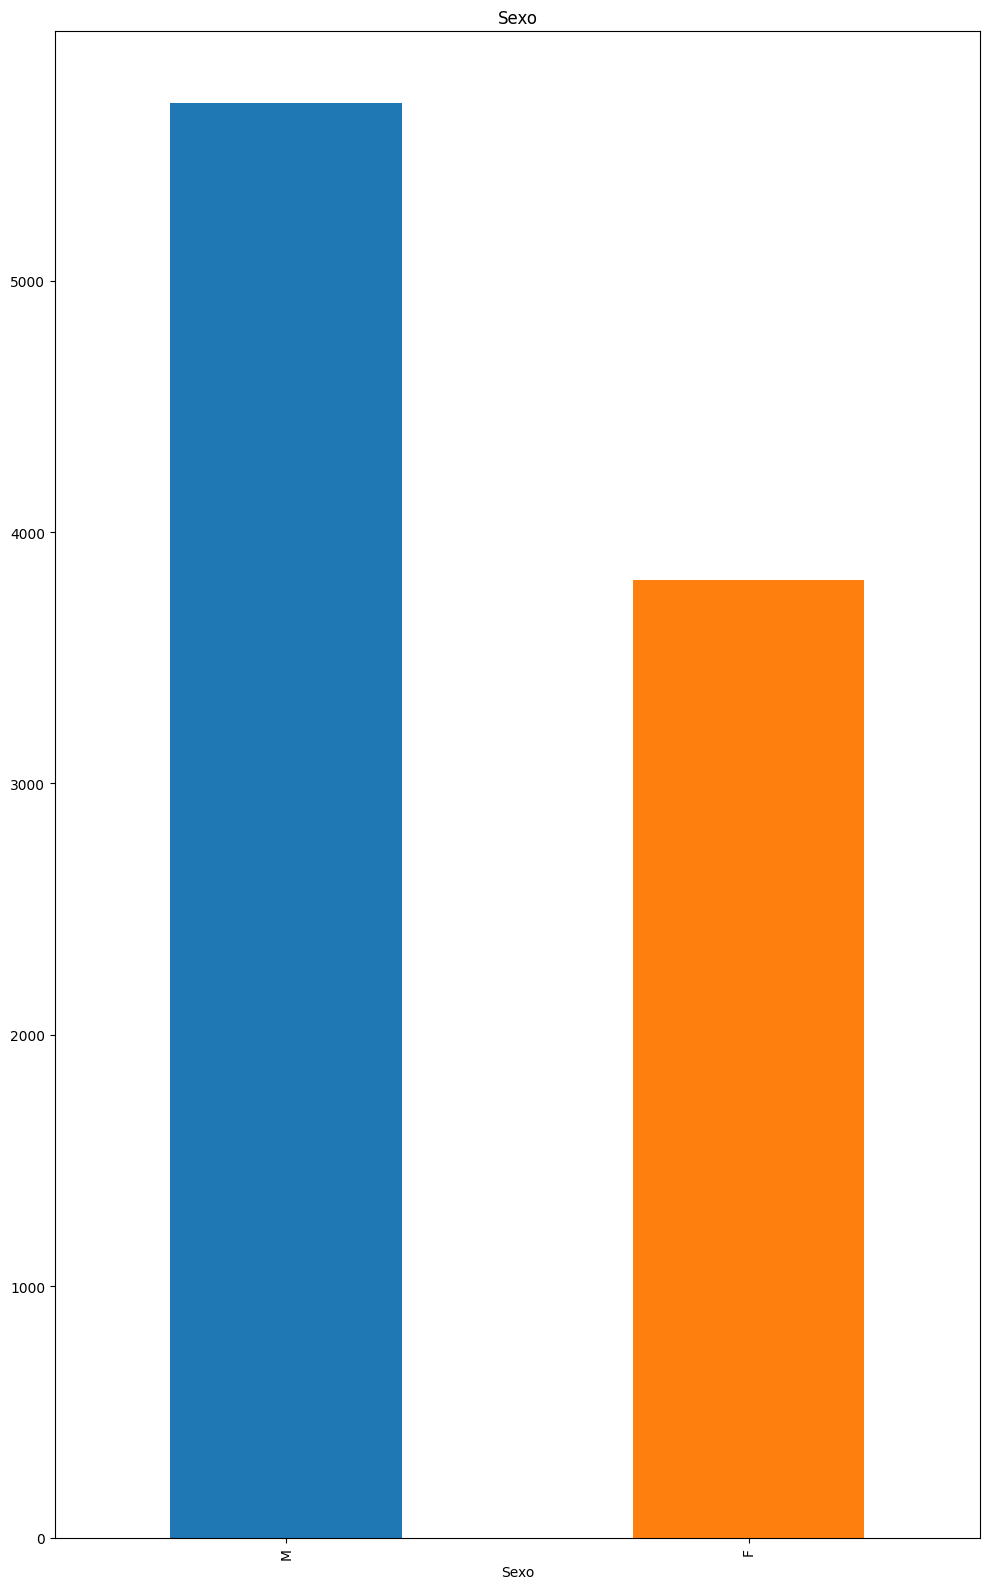

In [ ]:
# Quantidade de Cliente por Sexo
df_original.Sexo.value_counts().plot(kind='bar', title='Sexo', color = ['#1F77B4', '#FF7F0E'])

<Axes: title={'center': 'UF Cliente'}, xlabel='UF_Cliente'>

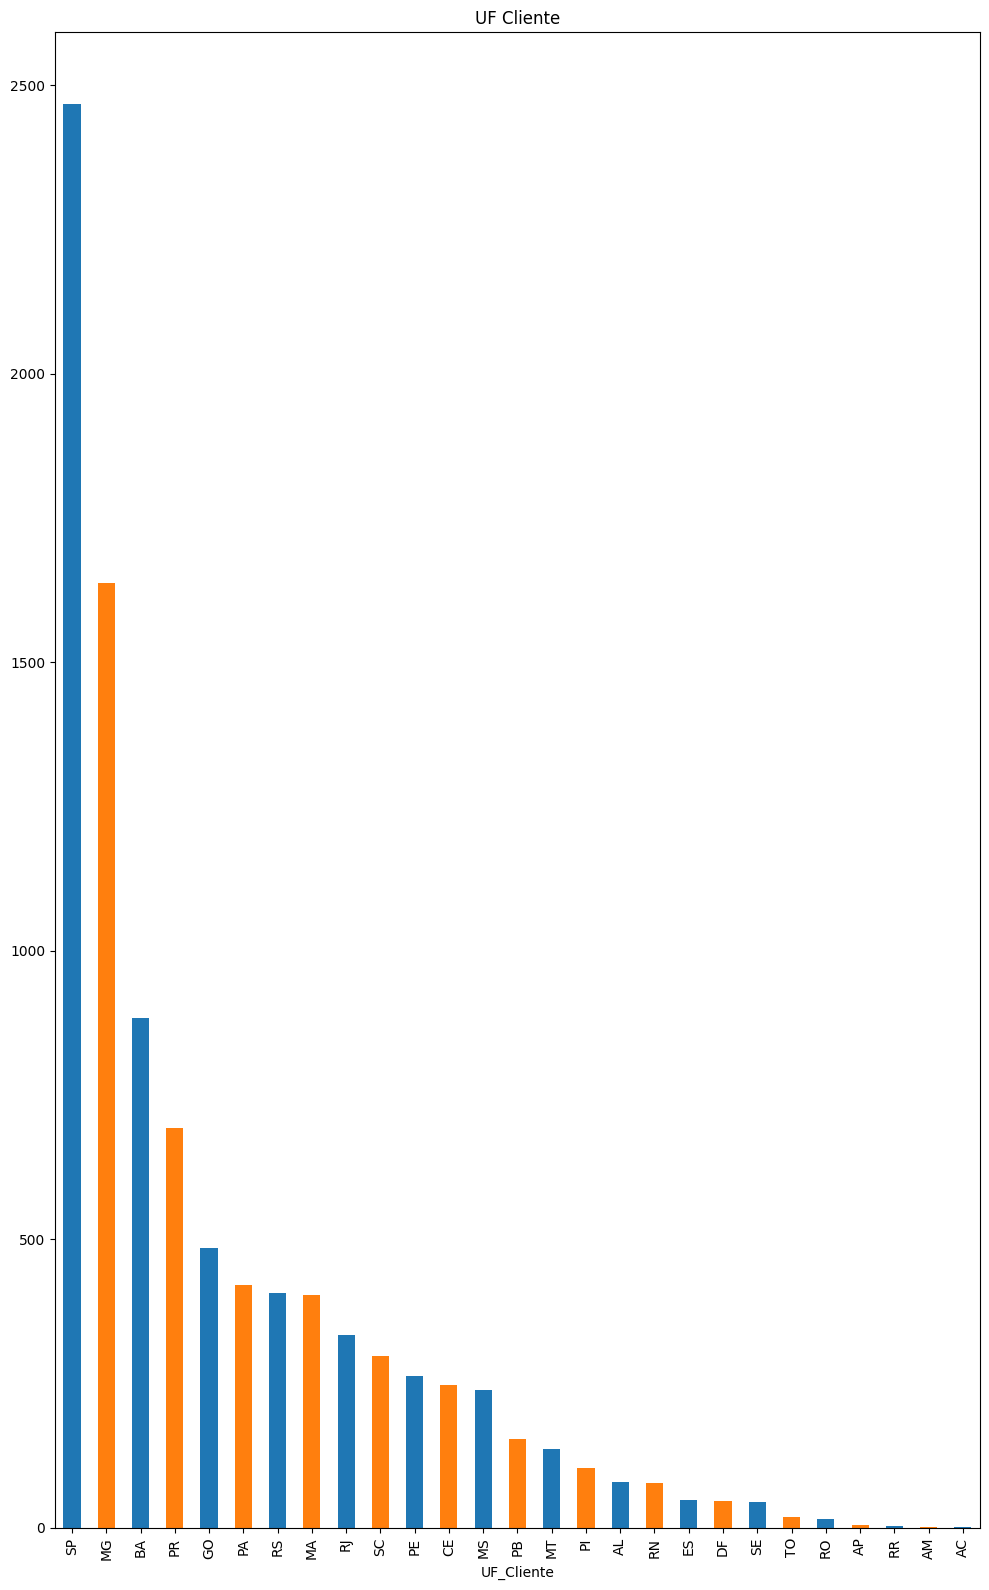

In [ ]:
# Quantidade de Cliente por UF
df_original.UF_Cliente.value_counts().plot(kind='bar', title='UF Cliente', color = ['#1F77B4', '#FF7F0E'])

<Axes: title={'center': 'Prazo Emprestimo'}, xlabel='Faixa_Prazo_Emprestimo'>

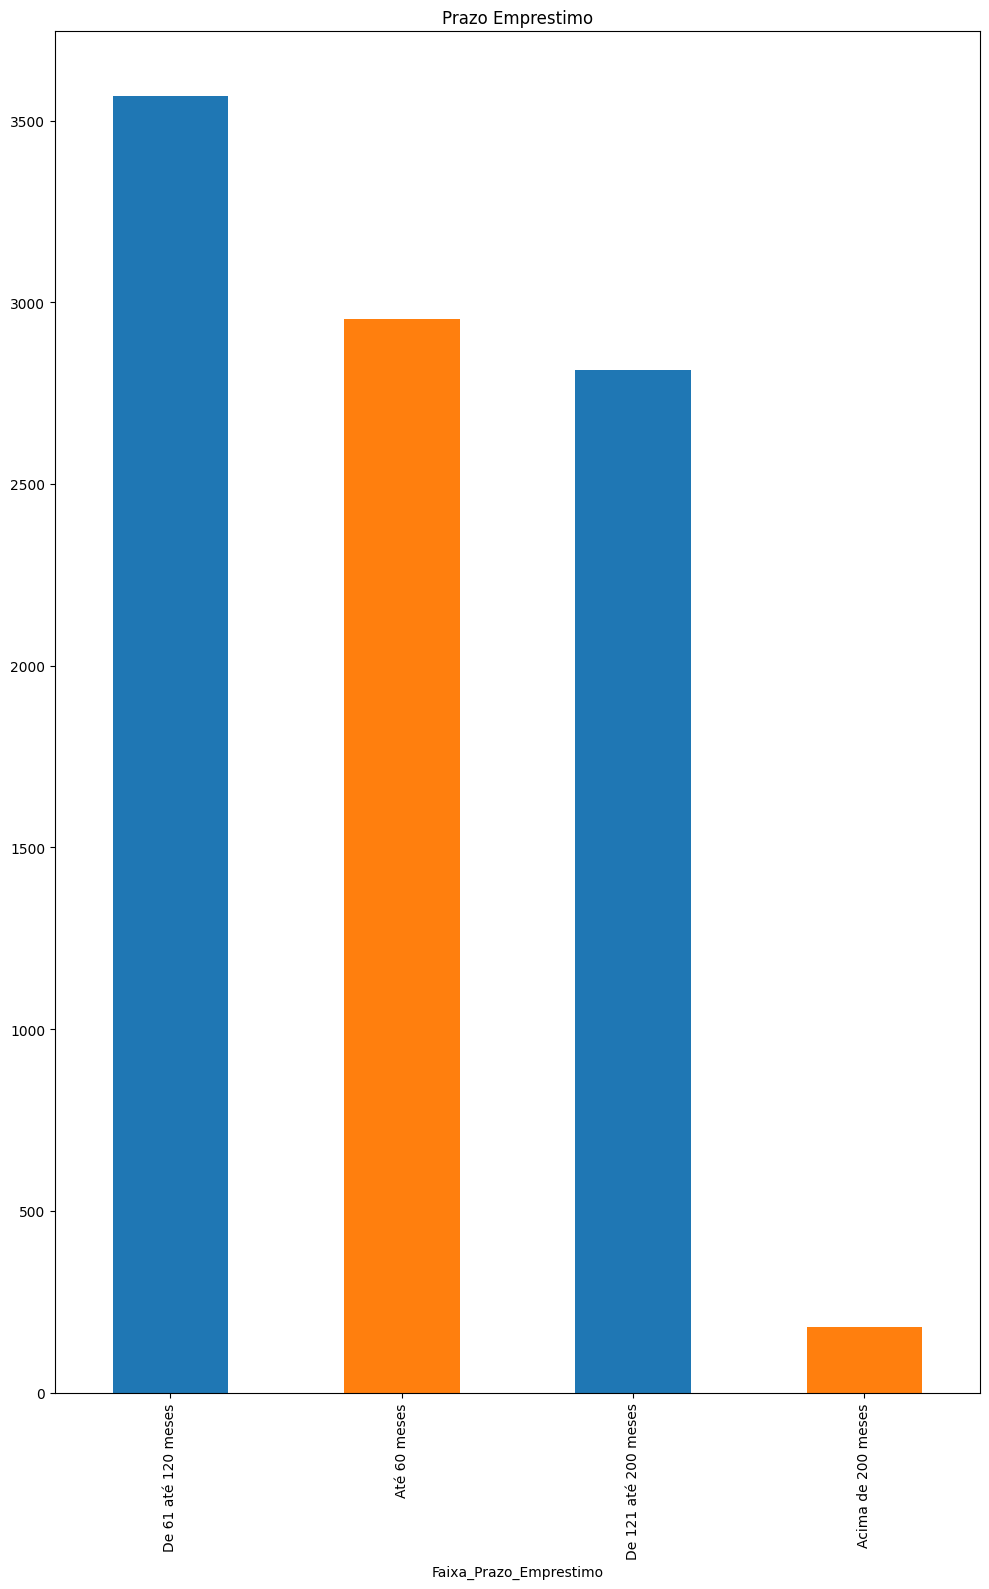

In [ ]:
# Quantidade de Cliente por Tempo de Emprestimo
df_original.Faixa_Prazo_Emprestimo.value_counts().plot(kind='bar', title='Prazo Emprestimo', color = ['#1F77B4', '#FF7F0E'])

<Axes: title={'center': 'Prazo Restante'}, xlabel='Faixa_Prazo_Restante'>

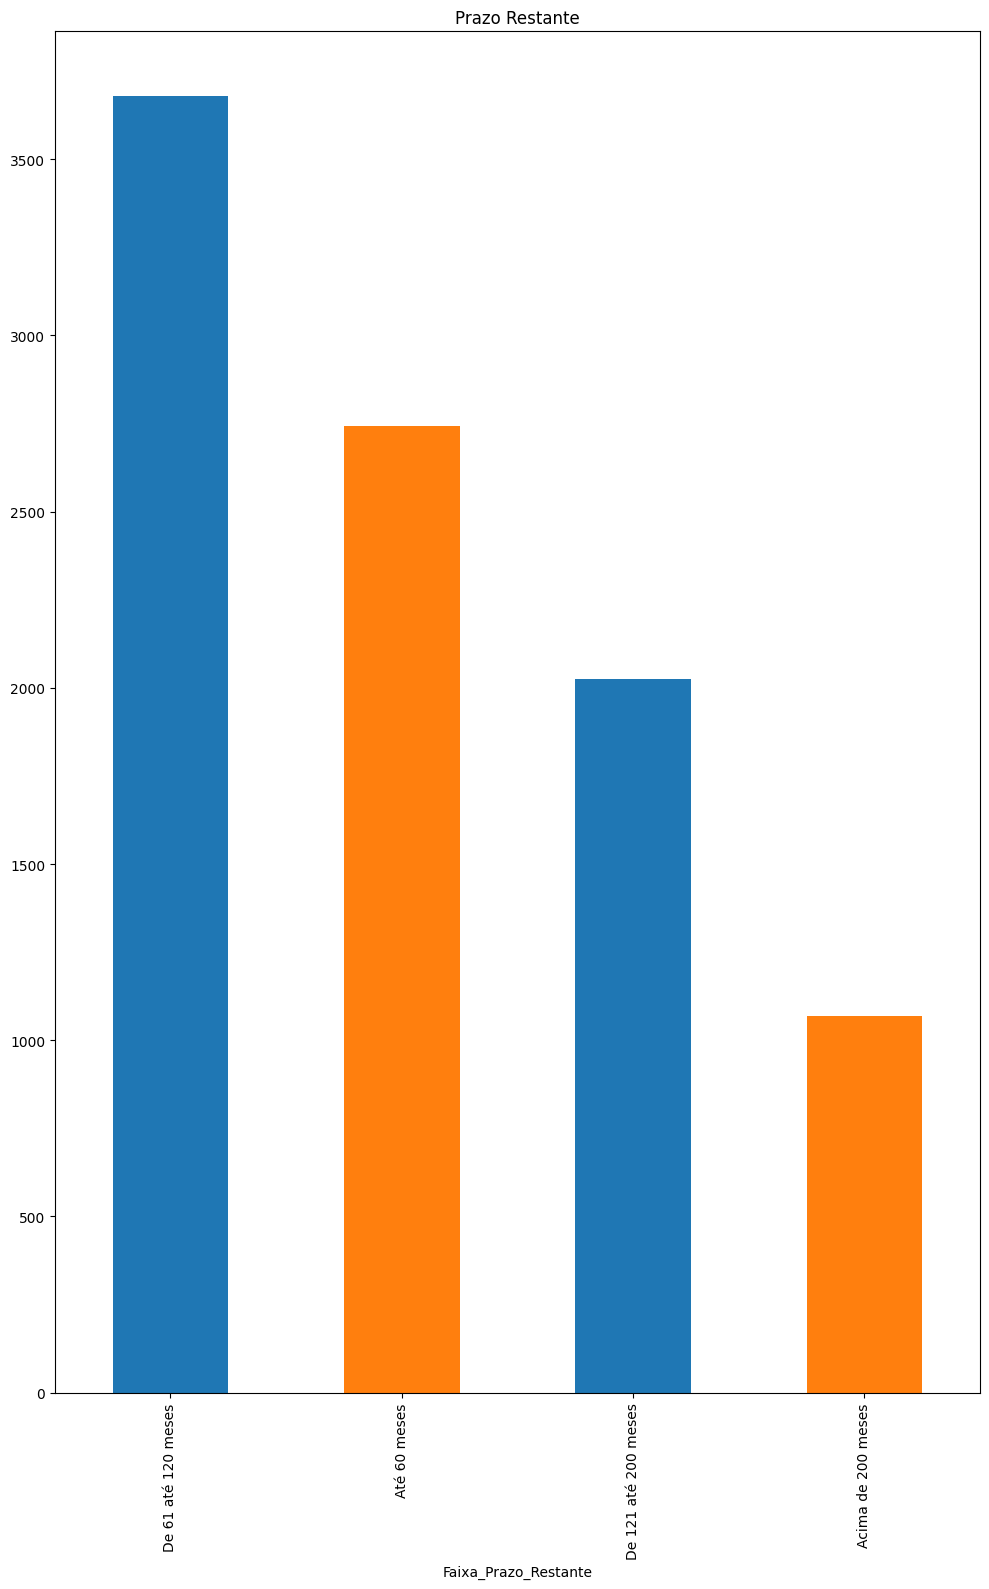

In [ ]:
# Quantidade de Cliente por meses Restante
df_original.Faixa_Prazo_Restante.value_counts().plot(kind='bar', title='Prazo Restante', color = ['#1F77B4', '#FF7F0E'])

<Axes: title={'center': 'Estado Civil'}, xlabel='Estado_Civil'>

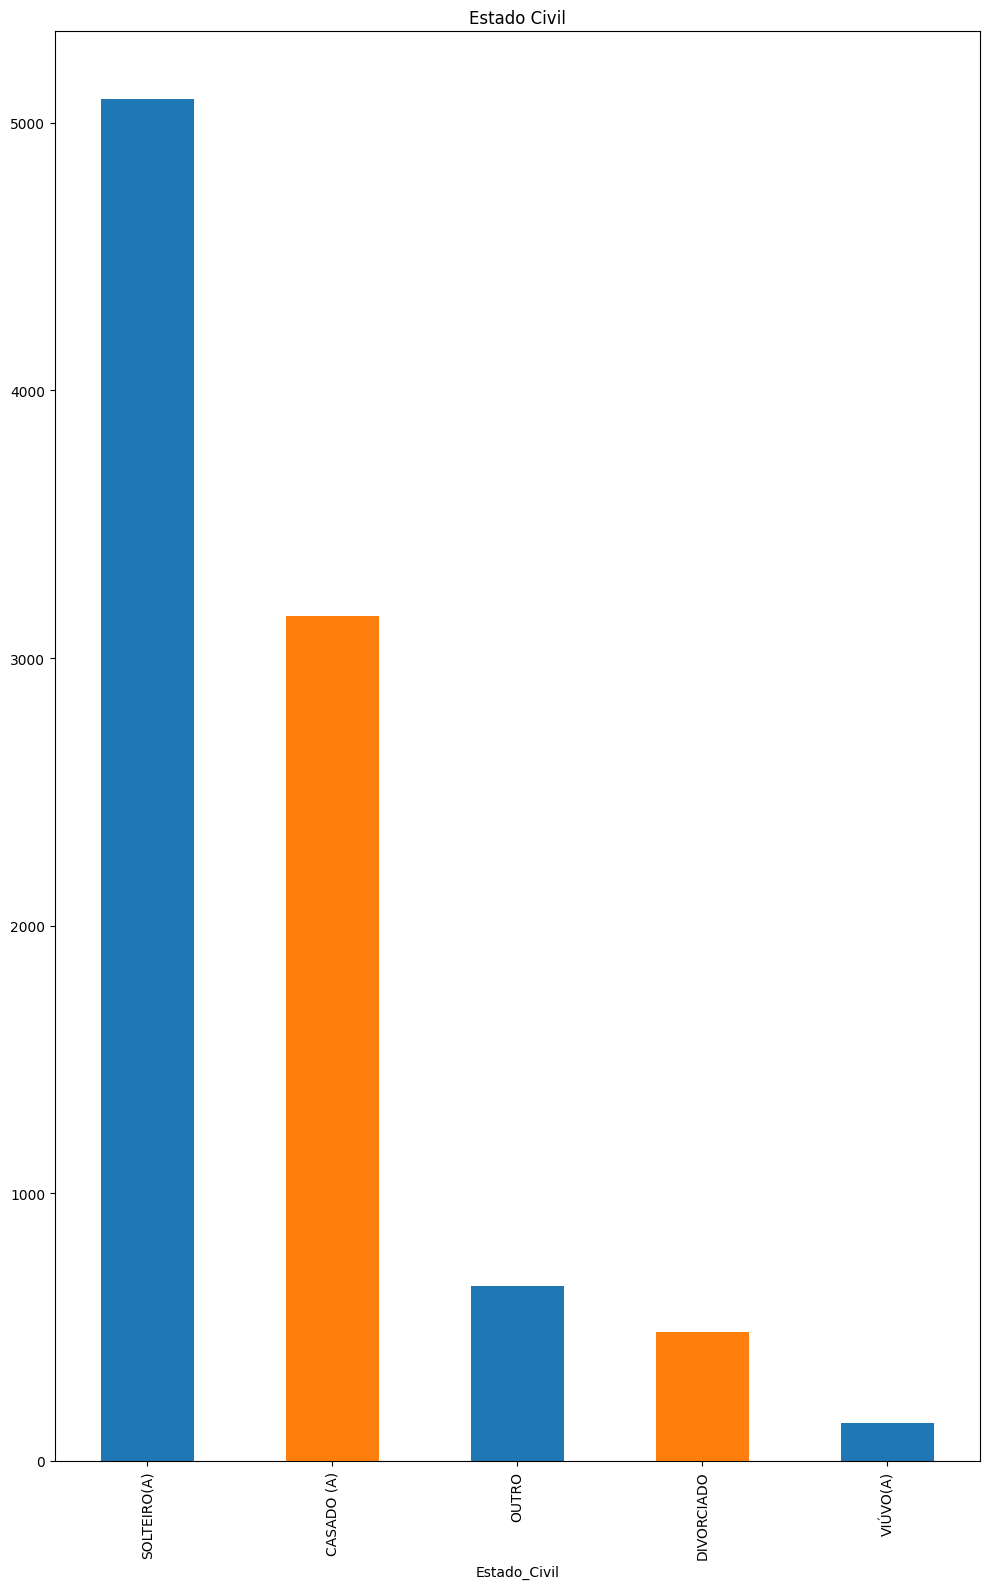

In [ ]:
# Quantidade de Cliente por Estado Civil
df_original.Estado_Civil.value_counts().plot(kind='bar', title='Estado Civil', color = ['#1F77B4', '#FF7F0E'])

<Axes: title={'center': 'Escolaridade'}, xlabel='Escolaridade'>

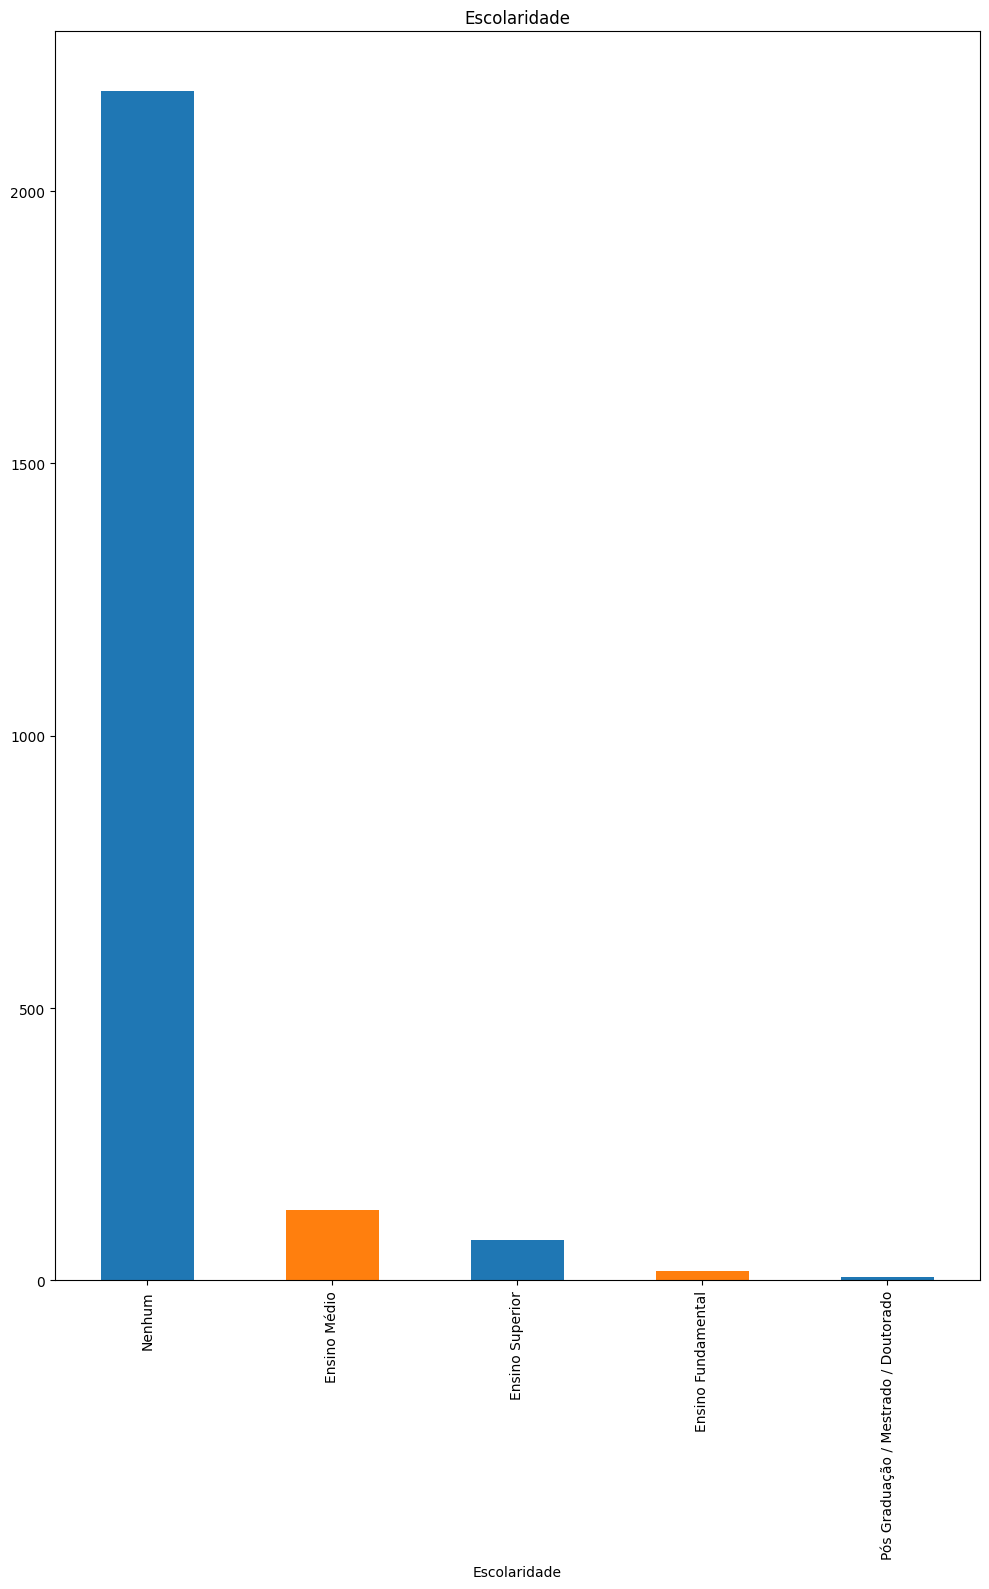

In [ ]:
# Nível de Escolaridade por Cliente
df_original.Escolaridade.value_counts().plot(kind='bar', title='Escolaridade', color = ['#1F77B4', '#FF7F0E'])

<Axes: title={'center': 'Faixa Dias Atraso'}, xlabel='Faixa_Dias_Atraso'>

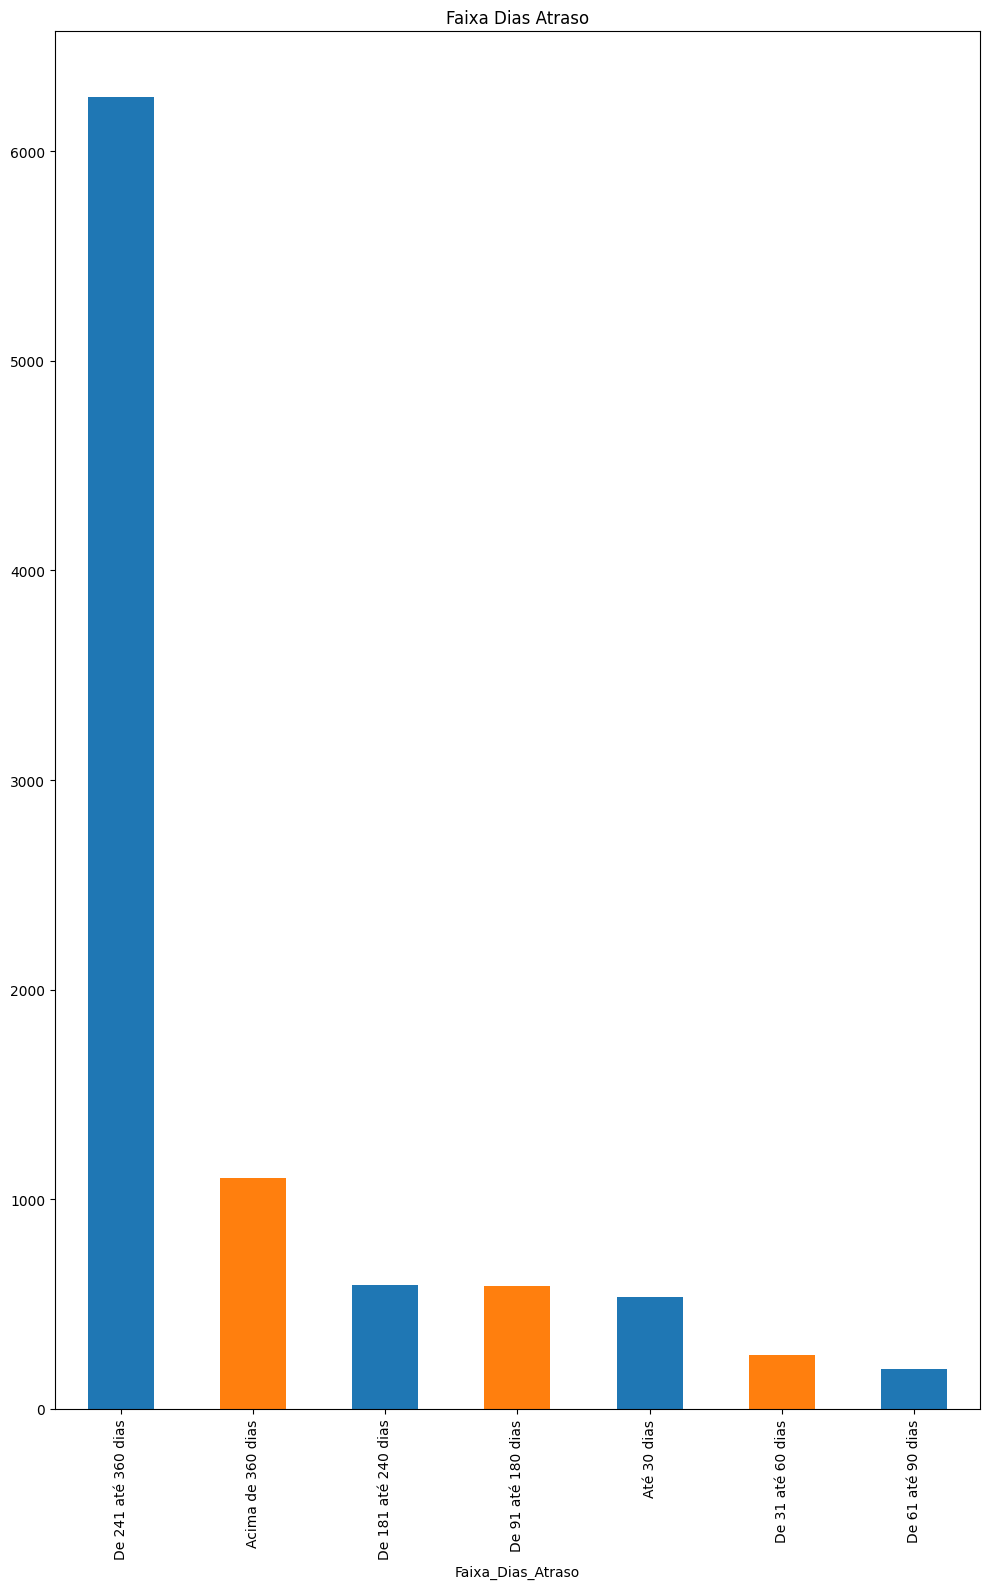

In [ ]:
# Quantidade de Cliente por dias em Atraso
df_original.Faixa_Dias_Atraso.value_counts().plot(kind='bar', title='Faixa Dias Atraso', color = ['#1F77B4', '#FF7F0E'])

<Axes: title={'center': 'Faixa Salarial'}, xlabel='Faixa_Salarial'>

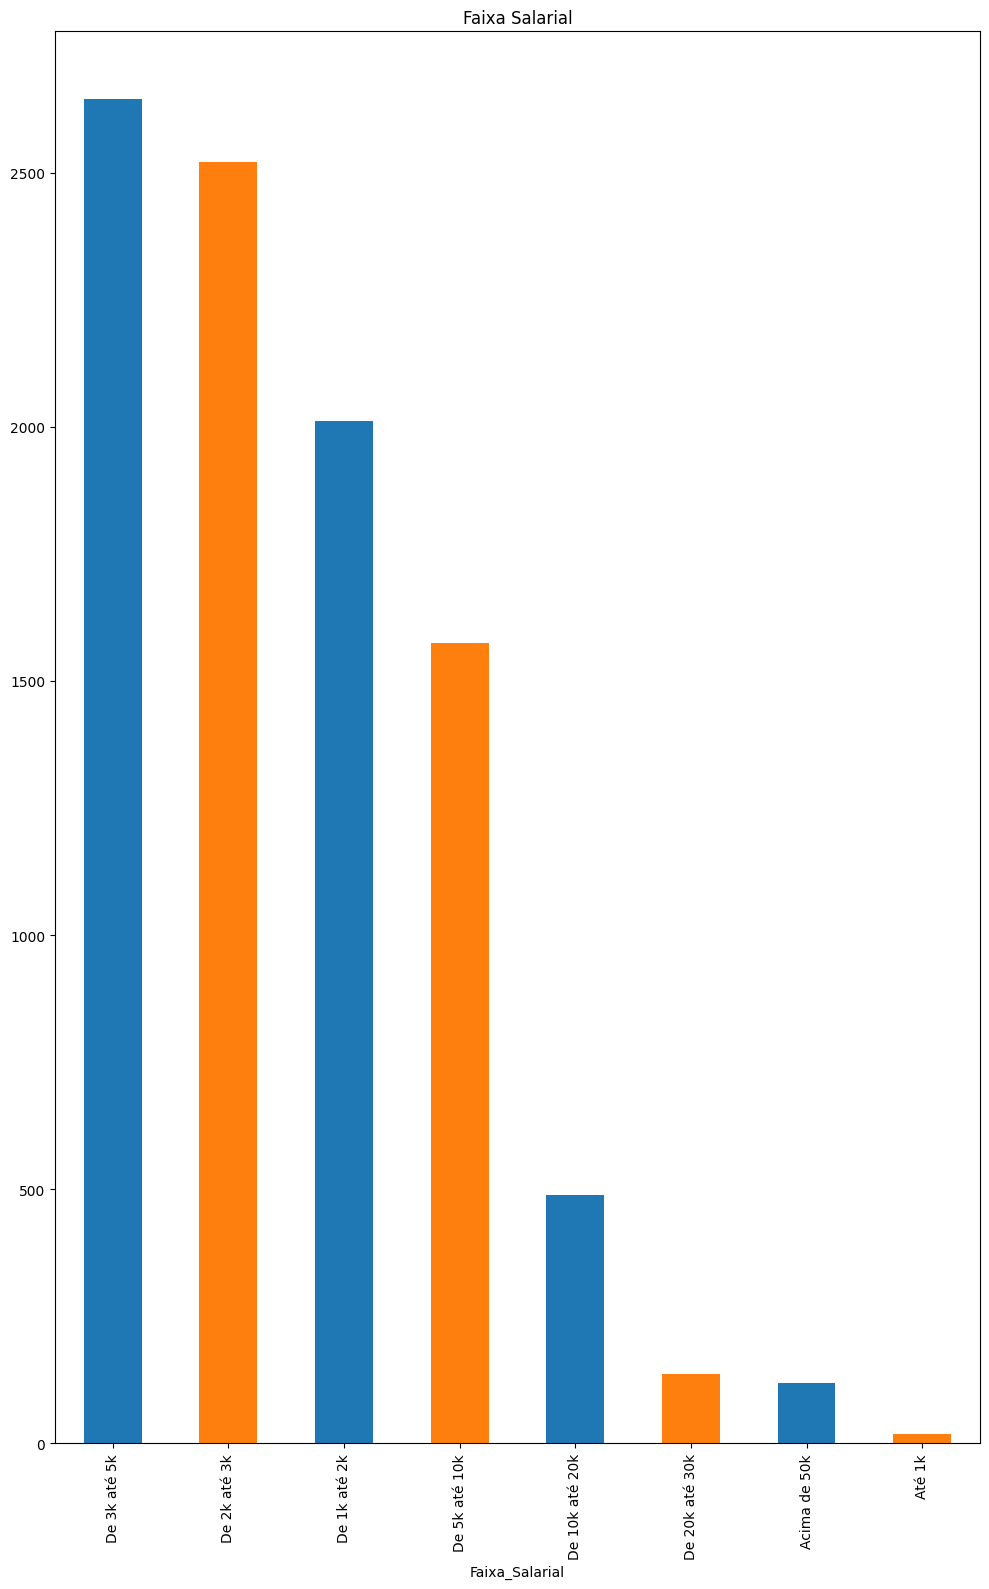

In [ ]:
# Faixa Salarial por Cliente
df_original.Faixa_Salarial.value_counts().plot(kind='bar', title='Faixa Salarial', color = ['#1F77B4', '#FF7F0E'])

<Axes: title={'center': 'Possíveis Fraudes'}, xlabel='Possivel_Fraude'>

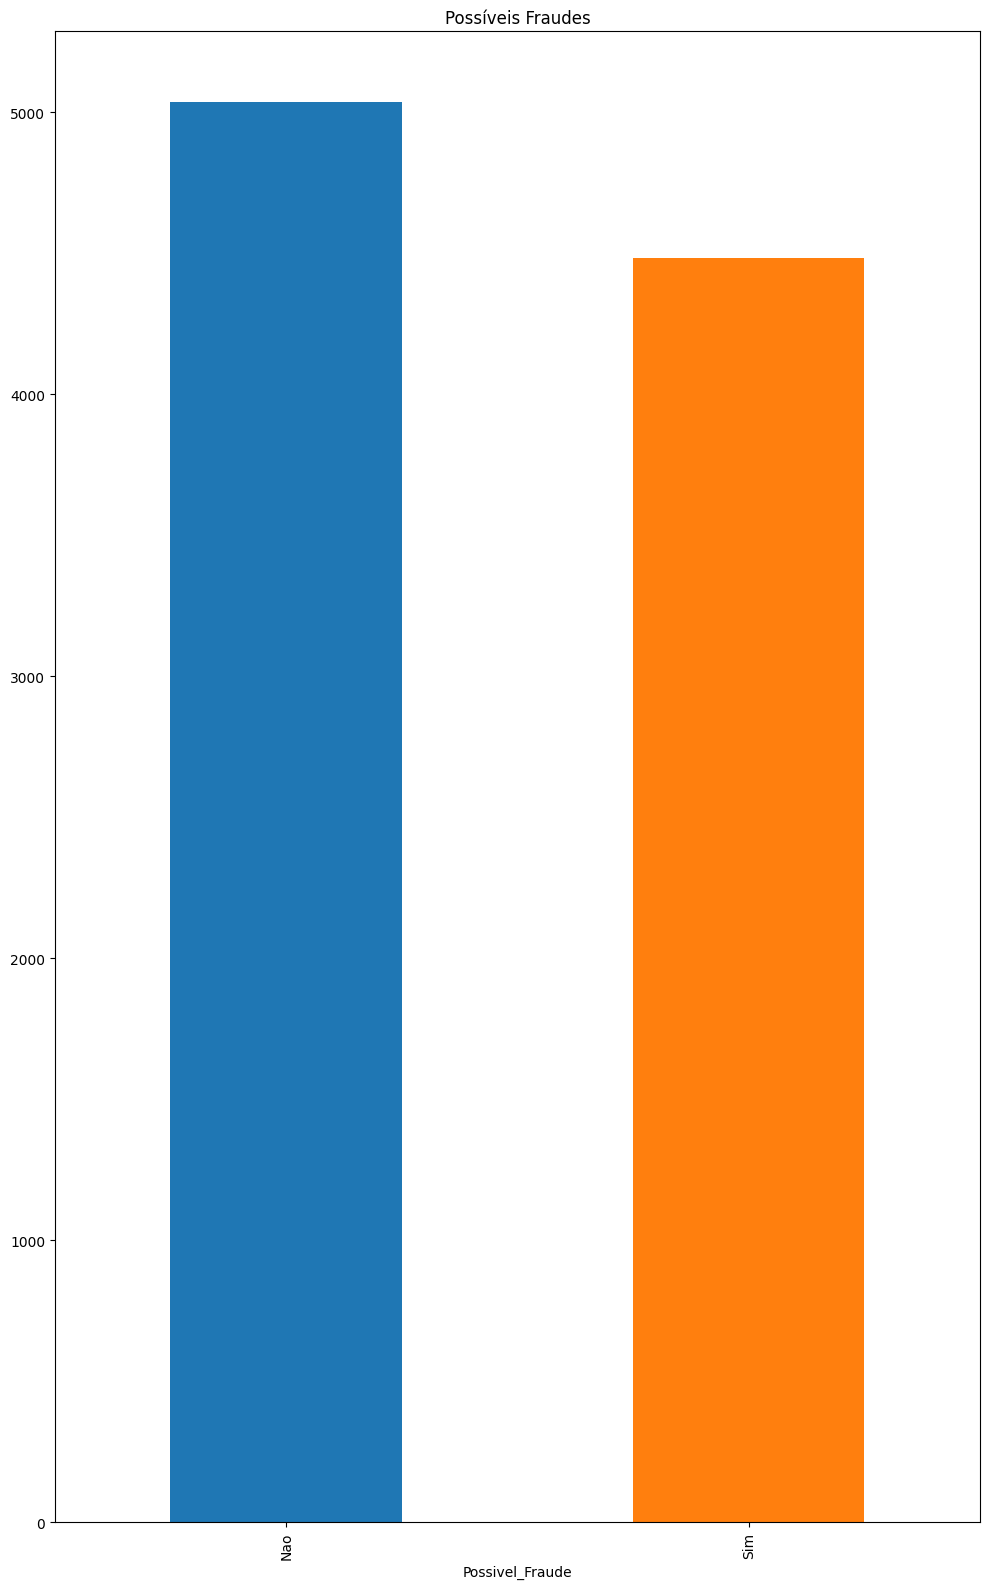

In [ ]:
# No gráfico abaixo vamos analisar a nossa variável alvo

df_original.Possivel_Fraude.value_counts().plot(kind='bar', title='Possíveis Fraudes', color = ['#1F77B4', '#FF7F0E'])

Conforme mostrado no gráfico, há muitos dados como 'Não possíveis fraudes'. Vamos explorar mais esse dataset para avalir se precisaremos balancear essa contagem ou não.

### Analisar o dataset após o tratamento dos dados

In [ ]:
# Chamando o dataset após o tratamento
df_original.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Contrato                          9517 non-null   int64   
 1   Idade                             9517 non-null   int64   
 2   Sexo                              9517 non-null   object  
 3   Valor_Renda                       9517 non-null   float64 
 4   UF_Cliente                        9517 non-null   object  
 5   Perc_Juros                        9517 non-null   float64 
 6   Prazo_Emprestimo                  9517 non-null   int64   
 7   Data_Contratacao                  9517 non-null   object  
 8   Prazo_Restante                    9517 non-null   int64   
 9   VL_Emprestimo                     9517 non-null   float64 
 10  VL_Emprestimo_ComJuros            9517 non-null   float64 
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64 

In [ ]:
# Analise das colunas que iremos utilizar
df_original.columns

Index(['Contrato', 'Idade', 'Sexo', 'Valor_Renda', 'UF_Cliente', 'Perc_Juros',
       'Prazo_Emprestimo', 'Data_Contratacao', 'Prazo_Restante',
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'Escolaridade', 'Possui_Patrimonio',
       'VL_Patrimonio', 'QT_Parcelas_Atraso', 'QT_Dias_Atraso',
       'Saldo_Devedor', 'Total_Pago', 'Possivel_Fraude', 'Faixa_Etaria',
       'Faixa_Salarial', 'Faixa_Dias_Atraso', 'Faixa_Prazo_Emprestimo',
       'Faixa_Prazo_Restante'],
      dtype='object')

In [ ]:
# Separando as colunas necessárias para a análise

# Contrato --> Variável identifica cada cliente
# Data_Contrataca, VL_PAtrimonio, Possui_Patrimonio, Escolaridade, Idade --> Não tem relevância para o modelo
# Valor_renda, Prazo_Emprestimo, QT_Dias_Atraso, Prazo_Restante -> Essas Variáveis estão transformadas em categoria

# Iremos utilizar um novo conjunto de dados, chamando-o de df_dados

columns = [ 'Sexo', 'UF_Cliente', 'Perc_Juros',
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'QT_Parcelas_Atraso','Saldo_Devedor', 'Total_Pago', 'Faixa_Etaria',
       'Faixa_Salarial', 'Faixa_Dias_Atraso', 'Faixa_Prazo_Emprestimo',
       'Faixa_Prazo_Restante', 'Possivel_Fraude']

df_dados = pd.DataFrame(df_original, columns=columns)

In [ ]:
df_dados.shape

(9517, 19)

In [ ]:
df_dados.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Sexo                              9517 non-null   object  
 1   UF_Cliente                        9517 non-null   object  
 2   Perc_Juros                        9517 non-null   float64 
 3   VL_Emprestimo                     9517 non-null   float64 
 4   VL_Emprestimo_ComJuros            9517 non-null   float64 
 5   QT_Total_Parcelas_Pagas           9517 non-null   int64   
 6   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64   
 7   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64   
 8   Qt_Renegociacao                   9517 non-null   int64   
 9   Estado_Civil                      9517 non-null   object  
 10  QT_Parcelas_Atraso                9517 non-null   int64   
 11  Saldo_Devedor                     9517 non-null   float6

In [ ]:
# Analisar se nenhuma coluna, mesmo depois do tratamento dos dados, não existe nenhum valor nulo
df_dados.isnull().sum()

Sexo                                0
UF_Cliente                          0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
Estado_Civil                        0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Etaria                        0
Faixa_Salarial                      0
Faixa_Dias_Atraso                   0
Faixa_Prazo_Emprestimo              0
Faixa_Prazo_Restante                0
Possivel_Fraude                     0
dtype: int64

Vimos que após o tratamento dos dados, conseguimos alterar os valores em nulos do nosso dataset. A partir de agora, a análise pode ser mais precisa.

### Analise Exploratória em variáveis Categóricas
##### Analisar em 2 casos:
* 1 - Conhecer como a variável alvo (Possivel_Fraude) está sendo relacioanada com outras variáveis
* 2 - Avaliar as variáveis categóricas para conhecimento dos dados e descartar variáveis que não fazem sentido.

In [ ]:
# Ajustando o tamanho dos gráficos
plt.rcParams['figure.figsize'] = [10.00,4.00]
plt.rcParams['figure.autolayout'] = True

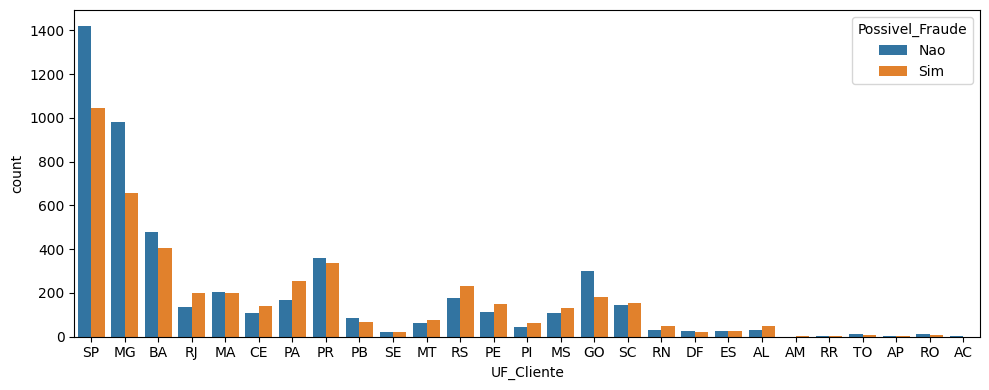

In [ ]:
# Visualizando se não há discrepancia nas variáveis UF_Cliente e Possivel_Fraude

sns.countplot(data = df_original, x = "UF_Cliente", hue = "Possivel_Fraude")
plt.show()

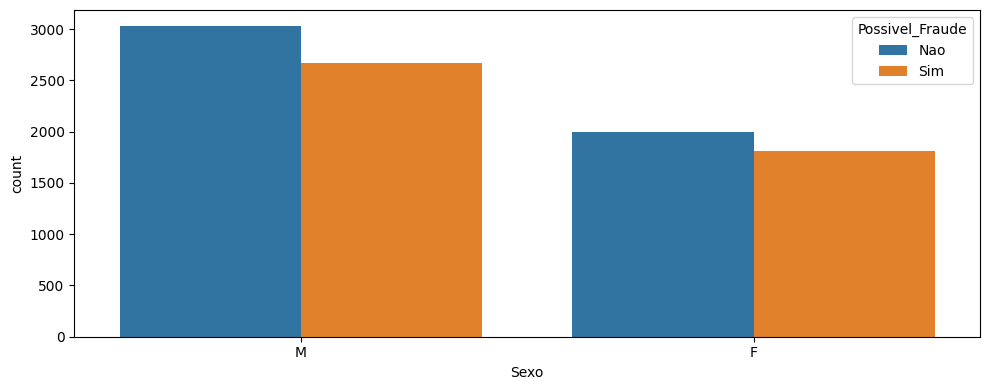

In [ ]:
# Visualizando se não há discrepancia nas variáveis Sexo Possivel_Fraude

sns.countplot(data = df_original, x = "Sexo", hue = "Possivel_Fraude")
plt.show()

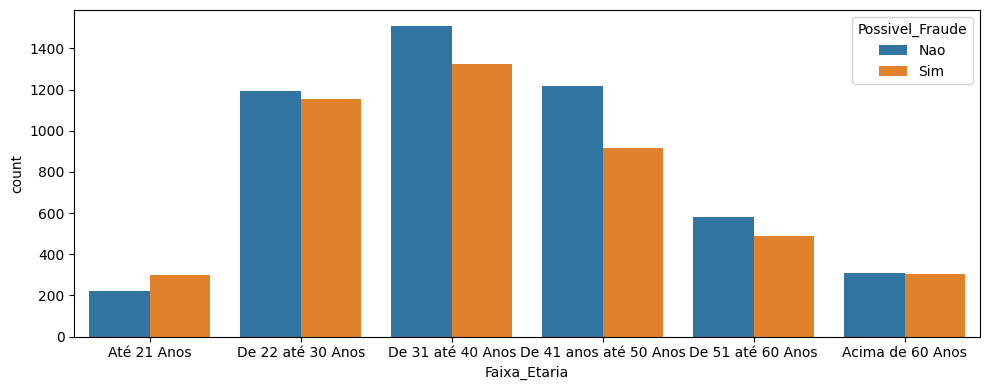

In [ ]:
# Visualizando se não há discrepancia nas variáveis Faixa_Etaria e Possivel_Fraude

sns.countplot(data = df_original, x = "Faixa_Etaria", hue = "Possivel_Fraude")
plt.show()

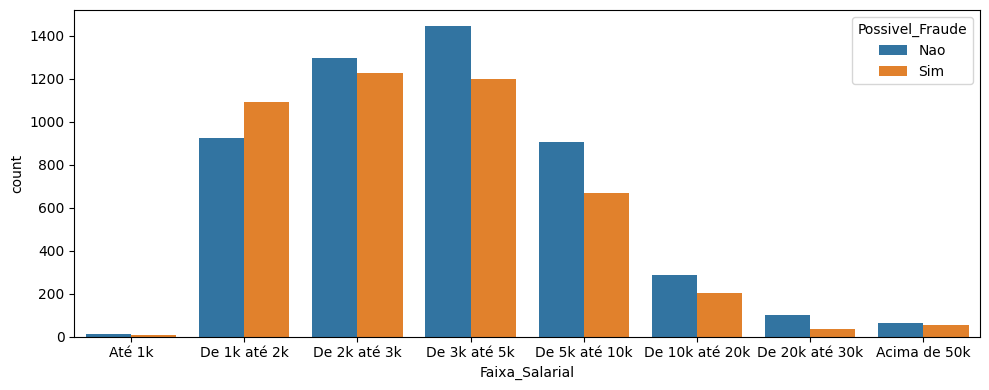

In [ ]:
# Visualizando se não há discrepancia nas variáveis Faixa_Salarial e Possivel_Fraude

sns.countplot(data = df_original, x = "Faixa_Salarial", hue = "Possivel_Fraude")
plt.show()

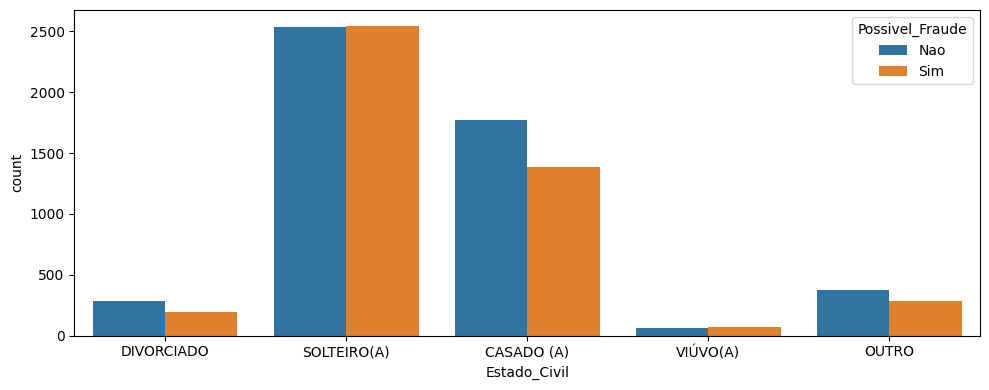

In [ ]:
# Visualizando se não há discrepancia nas variáveis Estado_Civil e Possivel_Fraude

sns.countplot(data = df_original, x = "Estado_Civil", hue = "Possivel_Fraude")
plt.show()

Ao olharmos o gráfico acima, podemos identificar pouco volume de dados em Divorciado e Viúvo. Neste caso, iremos tratar os dados para agregá-los à coluna OUTRO.

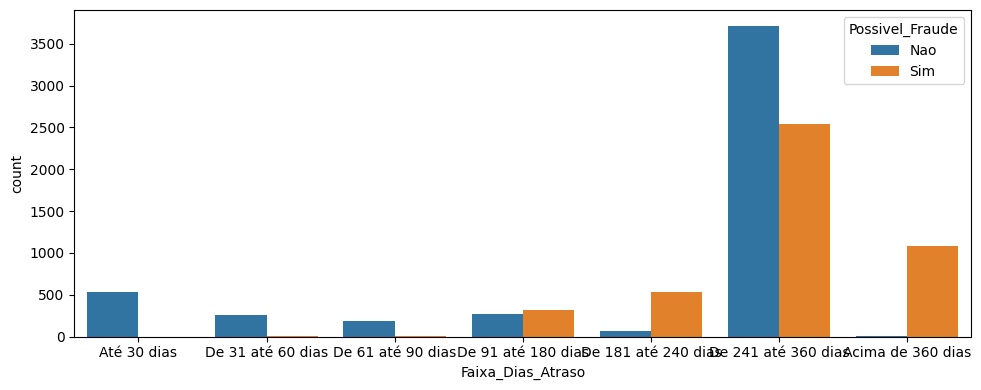

In [ ]:
# Visualizando se não há discrepancia nas variáveis Faixa_Dias_Atraso e Possivel_Fraude

sns.countplot(data = df_original, x = "Faixa_Dias_Atraso", hue = "Possivel_Fraude")
plt.show()

Aqui é possível identificar cotas que geram prejuízo para a arrecadação de taxa administrativa. Iremos analisar mais a fundo essa variável, pois conseguiremos encontrar um padrão de atraso.

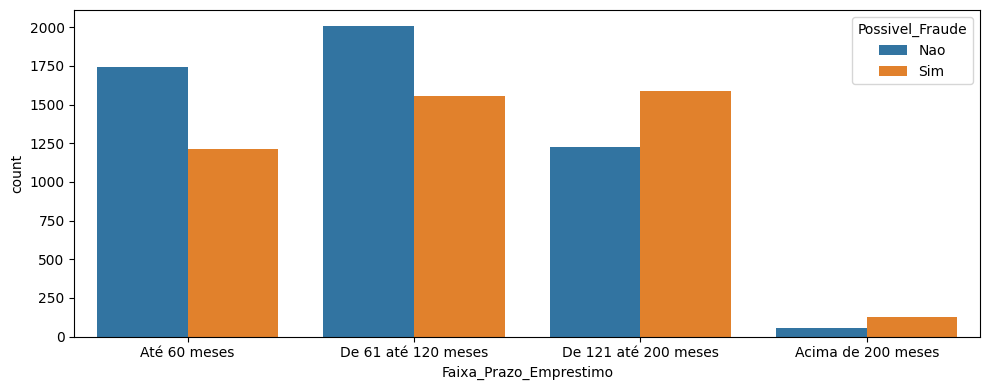

In [ ]:
# Visualizando se não há discrepancia nas variáveis Faixa_Prazo_Emprestimo e Possivel_Fraude

sns.countplot(data = df_original, x = "Faixa_Prazo_Emprestimo", hue = "Possivel_Fraude")
plt.show()

Não houve discrepancia nas variáveis.

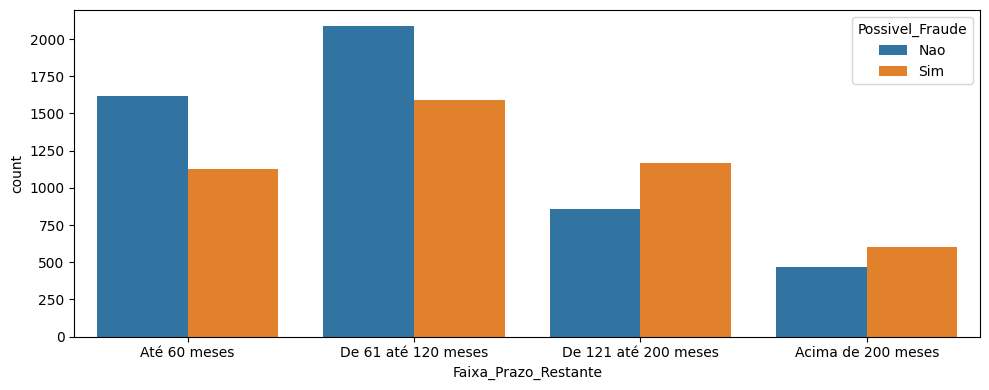

In [ ]:
# Visualizando se não há discrepancia nas variáveis Faixa_Prazo_restante e Possivel_Fraude

sns.countplot(data = df_original, x = "Faixa_Prazo_Restante", hue = "Possivel_Fraude")
plt.show()

In [ ]:
# Vamos analisar as métricas do nosso novo conjunto de dados
df_dados.describe()

,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago
count,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00,9517.00
mean,19.65,81881.89,94164.17,7.89,4.11,1.60,1.24,5.35,90560.27,8166.21
std,3.82,94138.06,108258.77,5.17,4.04,2.31,1.17,5.32,111050.54,16697.76
min,7.00,3500.00,4025.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,18.00,20000.00,23000.00,2.00,1.00,0.00,0.00,0.00,18546.85,1202.04
50%,20.00,50000.00,57500.00,9.00,2.00,1.00,1.00,4.00,45375.30,3949.91
75%,22.00,100000.00,115000.00,13.00,6.00,2.00,2.00,11.00,119721.25,8302.01
max,28.00,500000.00,575000.00,35.00,35.00,14.00,9.00,15.00,625000.00,396385.00


In [ ]:
# Total de valores únicos de cada variável do novo dataset
valores_unicos = []
for i in df_dados.columns[0:19].tolist():
    print(i, ':', len(df_dados[i].astype(str).value_counts()))
    valores_unicos.append(len(df_dados[i].astype(str).value_counts()))

Sexo : 2
UF_Cliente : 27
Perc_Juros : 21
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 5
QT_Parcelas_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Faixa_Etaria : 6
Faixa_Salarial : 8
Faixa_Dias_Atraso : 7
Faixa_Prazo_Emprestimo : 4
Faixa_Prazo_Restante : 4
Possivel_Fraude : 2


### Analise Exploratória - Variáveis Numéricas
##### Nesta analise temos diversos objetivos:
* 1 - Conhecer as variáveis
* 2 - Realizar uma analise estatística nas variáveis para futuros tratamentos. Iremos analisar média, mediana, moda, desvio padrão, correlações, outliers, distribuição dos dados, etc.

In [ ]:
# Carregando as variáveis para plot
variaveis_numericas = []
for i in df_dados.columns[0:19].tolist():
    if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':
        variaveis_numericas.append(i)

In [ ]:
# Exibindo as variáveis numéricas
variaveis_numericas

['Perc_Juros',
 'VL_Emprestimo',
 'VL_Emprestimo_ComJuros',
 'QT_Total_Parcelas_Pagas',
 'QT_Total_Parcelas_Pagas_EmDia',
 'QT_Total_Parcelas_Pagas_EmAtraso',
 'Qt_Renegociacao',
 'QT_Parcelas_Atraso',
 'Saldo_Devedor',
 'Total_Pago']

In [ ]:
# Quantidade de variáveis numéricas
len(variaveis_numericas)

10

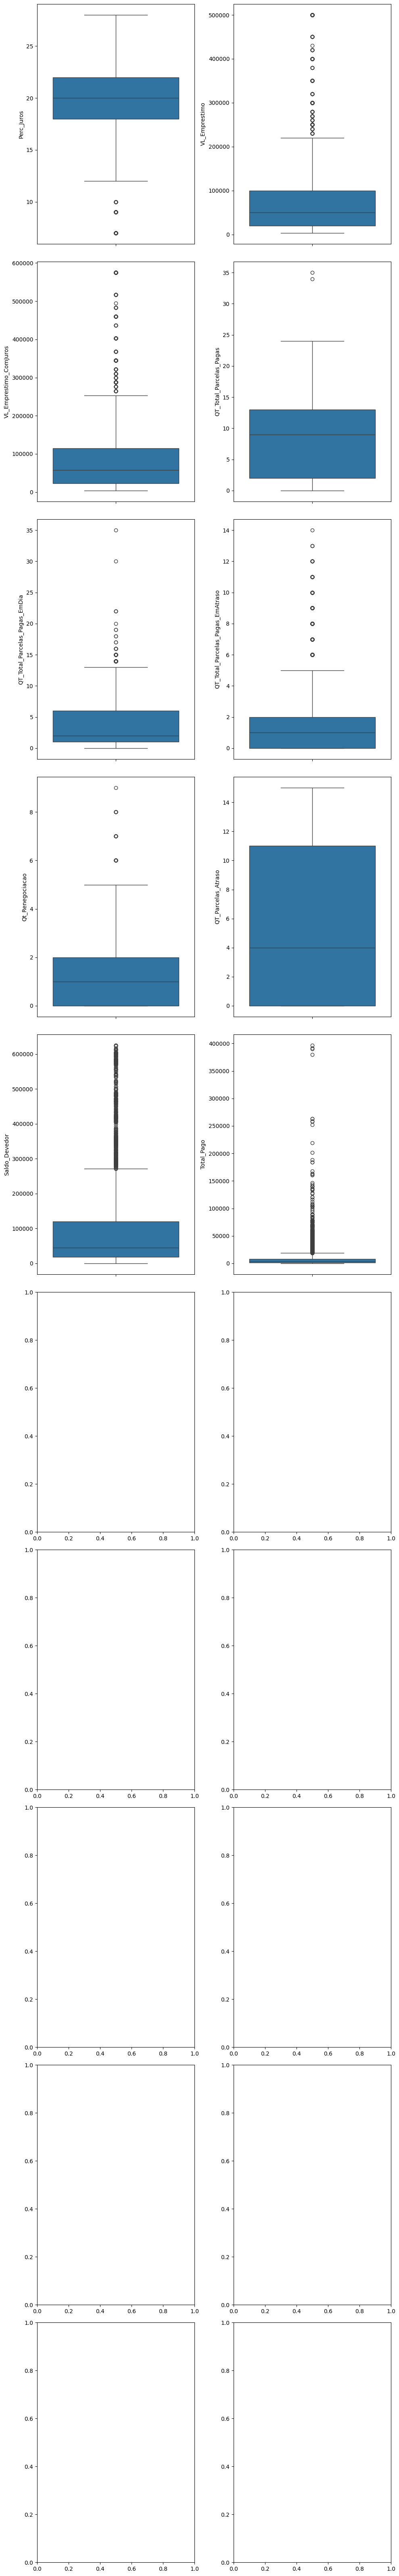

In [ ]:
# Podemos Observar nos boxplots abaixo que as variáveis numéricas apresentam uma grande quanitdade de "Possíveis Fraudes"
# Vamos avaliar cada uma dessas variáveis dentro do contexto dos dados para saber se realmente iremos tratar os dados

# Ajustando o tamanho dos gráficos
plt.rcParams['figure.figsize'] = [10.00,64.00]
plt.rcParams['figure.autolayout'] = True
f, axes = plt.subplots(10,2) # 10 linhas e 2 colunas

linha = 0
coluna = 0
for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna +=1
    if coluna == 2:
        linha += 1
        coluna = 0

plt.show()

In [ ]:
# Dataset antes do OneHotEncoder

df_dados.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Etaria,Faixa_Salarial,Faixa_Dias_Atraso,Faixa_Prazo_Emprestimo,Faixa_Prazo_Restante,Possivel_Fraude
0,M,SP,23.00,80000.00,92000.00,15,9,1,0,DIVORCIADO,0,91759.97,7717.08,De 41 anos até 50 Anos,De 5k até 10k,De 241 até 360 dias,De 121 até 200 meses,De 121 até 200 meses,Nao
1,M,MG,20.00,50000.00,57500.00,10,10,0,0,SOLTEIRO(A),4,53981.18,6756.59,De 22 até 30 Anos,De 1k até 2k,De 91 até 180 dias,De 61 até 120 meses,De 61 até 120 meses,Nao
2,M,BA,18.00,100000.00,115000.00,15,5,1,0,CASADO (A),0,101150.02,17929.06,De 31 até 40 Anos,De 3k até 5k,De 241 até 360 dias,De 61 até 120 meses,De 61 até 120 meses,Nao
3,M,MG,20.00,30000.00,34500.00,1,1,0,0,SOLTEIRO(A),13,36208.10,369.10,Até 21 Anos,De 1k até 2k,Acima de 360 dias,De 61 até 120 meses,De 61 até 120 meses,Sim
4,M,MG,20.00,60000.00,69000.00,16,16,0,0,CASADO (A),0,60984.00,11845.24,De 51 até 60 Anos,De 2k até 3k,De 241 até 360 dias,De 61 até 120 meses,De 61 até 120 meses,Nao


In [ ]:
# Carregar variaveis categoricas para OneHotEncoding
# Vamos colocar o slice somente até a coluna de indice 18 para não pegar a variável target.
variaveis_categoricas = []
for i in df_dados.columns[0:18].tolist():
    if df_dados.dtypes[i] == 'object' or df_dados.dtypes[i] == 'category':
        variaveis_categoricas.append(i)

In [ ]:
# exibindo as variaveis categoricas
variaveis_categoricas

['Sexo',
 'UF_Cliente',
 'Estado_Civil',
 'Faixa_Etaria',
 'Faixa_Salarial',
 'Faixa_Dias_Atraso',
 'Faixa_Prazo_Emprestimo',
 'Faixa_Prazo_Restante']

In [ ]:
# Quantidade de variáveis categóricas
len(variaveis_categoricas)

8

In [ ]:
# Criando o OneHotEncoder
lb = LabelEncoder()

for var in variaveis_categoricas:
    df_dados[var] = lb.fit_transform(df_dados[var])

In [ ]:
# Verificando se apos a transformação não surgiu valor nulo
df_dados.isnull().sum()

Sexo                                0
UF_Cliente                          0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
Estado_Civil                        0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Etaria                        0
Faixa_Salarial                      0
Faixa_Dias_Atraso                   0
Faixa_Prazo_Emprestimo              0
Faixa_Prazo_Restante                0
Possivel_Fraude                     0
dtype: int64

Não surgiu nenhum valor nulo após a transformação

In [ ]:
# Exibindo o dataset após a transformação

df_dados.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Etaria,Faixa_Salarial,Faixa_Dias_Atraso,Faixa_Prazo_Emprestimo,Faixa_Prazo_Restante,Possivel_Fraude
0,1,25,23.00,80000.00,92000.00,15,9,1,0,1,0,91759.97,7717.08,4,7,3,2,2,Nao
1,1,10,20.00,50000.00,57500.00,10,10,0,0,3,4,53981.18,6756.59,2,3,6,3,3,Nao
2,1,4,18.00,100000.00,115000.00,15,5,1,0,0,0,101150.02,17929.06,3,6,3,3,3,Nao
3,1,10,20.00,30000.00,34500.00,1,1,0,0,3,13,36208.10,369.10,1,3,0,3,3,Sim
4,1,10,20.00,60000.00,69000.00,16,16,0,0,0,0,60984.00,11845.24,5,5,3,3,3,Nao


In [ ]:
# Identificando os tipos de dados
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sexo                              9517 non-null   int64  
 1   UF_Cliente                        9517 non-null   int64  
 2   Perc_Juros                        9517 non-null   float64
 3   VL_Emprestimo                     9517 non-null   float64
 4   VL_Emprestimo_ComJuros            9517 non-null   float64
 5   QT_Total_Parcelas_Pagas           9517 non-null   int64  
 6   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64  
 7   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64  
 8   Qt_Renegociacao                   9517 non-null   int64  
 9   Estado_Civil                      9517 non-null   int64  
 10  QT_Parcelas_Atraso                9517 non-null   int64  
 11  Saldo_Devedor                     9517 non-null   float64
 12  Total_

In [ ]:
# Visualizando a quantidade da variavel target para balanceamento
variavel_target = df_dados.Possivel_Fraude.value_counts()
variavel_target

Possivel_Fraude
Nao    5035
Sim    4482
Name: count, dtype: int64

In [ ]:
# Separando as variavies preditoras e target
Preditoras =  df_dados.iloc[:, 0:18]
target = df_dados.iloc[:, 18]

In [ ]:
# Visualizando a variável preditora
Preditoras.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Etaria,Faixa_Salarial,Faixa_Dias_Atraso,Faixa_Prazo_Emprestimo,Faixa_Prazo_Restante
0,1,25,23.00,80000.00,92000.00,15,9,1,0,1,0,91759.97,7717.08,4,7,3,2,2
1,1,10,20.00,50000.00,57500.00,10,10,0,0,3,4,53981.18,6756.59,2,3,6,3,3
2,1,4,18.00,100000.00,115000.00,15,5,1,0,0,0,101150.02,17929.06,3,6,3,3,3
3,1,10,20.00,30000.00,34500.00,1,1,0,0,3,13,36208.10,369.10,1,3,0,3,3
4,1,10,20.00,60000.00,69000.00,16,16,0,0,0,0,60984.00,11845.24,5,5,3,3,3


In [ ]:
# Visualizando a variavel target
target.head()

0    Nao
1    Nao
2    Nao
3    Sim
4    Nao
Name: Possivel_Fraude, dtype: object

In [ ]:
# Seed para reproduzir o mesmo resultado
seed = 100

# Criar um balanceador SMOTE
balanceador = SMOTE(random_state=seed)

# Aplicando o balanceador
Preditoras_Res, target_res = balanceador.fit_resample(Preditoras, target)

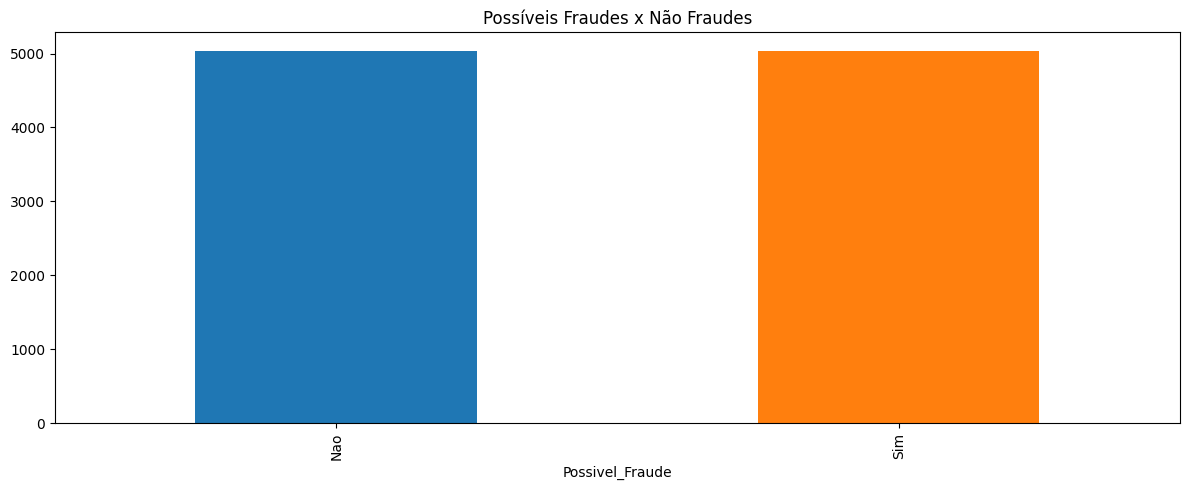

In [ ]:
# Visualizando o balanceamento da variável TARGET
plt.rcParams['figure.figsize'] = [12.00, 5.00]
plt.rcParams['figure.autolayout'] = True

target_res.value_counts().plot(kind='bar', title='Possíveis Fraudes x Não Fraudes', color = ['#1F77B4', '#FF7F0E']);

In [ ]:
# Quantidade de registro antes do balanceamento
Preditoras.shape

(9517, 18)

In [ ]:
# Quantidade de registro antes do balanceamento
target.shape

(9517,)

In [ ]:
# Quantidade de registro após o balanceamento
Preditoras_Res.shape

(10070, 18)

In [ ]:
# Quantidade de registro após o balanceamento
target_res.shape

(10070,)

Agora vamos iniciar o treinamento e o teste para o nosso modelo

In [ ]:
# Divisão em dados de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(Preditoras_Res, target_res, test_size = 0.3, random_state = 42)

In [ ]:
#Resultado do Treino X
X_treino.shape

(7049, 18)

é possível visualizar somente 7049, pois representa os 70% dos dados treinados, os 30% estão em teste.

In [ ]:
X_treino.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Etaria,Faixa_Salarial,Faixa_Dias_Atraso,Faixa_Prazo_Emprestimo,Faixa_Prazo_Restante
7012,0,17,19.00,500000.00,575000.00,1,1,0,1,4,12,600296.26,1942.30,5,7,3,2,0
8541,0,25,20.00,140000.00,161000.00,5,3,1,1,0,8,167073.02,2485.00,5,6,2,2,0
3903,0,4,28.00,12000.00,13800.00,1,1,0,0,0,13,15717.44,332.66,2,6,0,1,1
1844,0,25,18.00,50000.00,57500.00,13,5,3,5,3,0,13084.40,26422.41,1,3,3,1,1
8303,1,9,21.00,15000.00,17250.00,13,3,4,1,3,0,14096.18,4423.11,2,6,3,1,1


é possível identificar que os dados estão fora de escala, vamos normalizar os dados para treino e teste.

In [ ]:
# Normalizando as variáveis

Normalizador = MinMaxScaler()
X_treino_normalizado = Normalizador.fit_transform(X_treino)
X_teste_normalizado = Normalizador.fit_transform(X_teste)

In [ ]:
X_treino_normalizado.shape

(7049, 18)

In [ ]:
# Visualizando os dados normalizados
X_treino_normalizado

array([[0.        , 0.65384615, 0.57142857, ..., 0.5       , 0.66666667,
        0.        ],
       [0.        , 0.96153846, 0.61904762, ..., 0.33333333, 0.66666667,
        0.        ],
       [0.        , 0.15384615, 1.        , ..., 0.        , 0.33333333,
        0.33333333],
       ...,
       [1.        , 0.96153846, 0.71428571, ..., 0.5       , 0.66666667,
        0.66666667],
       [1.        , 0.88461538, 0.57142857, ..., 1.        , 0.66666667,
        0.66666667],
       [1.        , 0.96153846, 0.85714286, ..., 0.5       , 1.        ,
        1.        ]])

In [ ]:
# Padronizando os dados

Padronizador = MinMaxScaler()
X_treino_padronizado = Padronizador.fit_transform(X_treino)
X_teste_padronizado = Padronizador.fit_transform(X_teste)

In [ ]:
# Visualizando os dados Padronizados
X_treino_padronizado

array([[0.        , 0.65384615, 0.57142857, ..., 0.5       , 0.66666667,
        0.        ],
       [0.        , 0.96153846, 0.61904762, ..., 0.33333333, 0.66666667,
        0.        ],
       [0.        , 0.15384615, 1.        , ..., 0.        , 0.33333333,
        0.33333333],
       ...,
       [1.        , 0.96153846, 0.71428571, ..., 0.5       , 0.66666667,
        0.66666667],
       [1.        , 0.88461538, 0.57142857, ..., 1.        , 0.66666667,
        0.66666667],
       [1.        , 0.96153846, 0.85714286, ..., 0.5       , 1.        ,
        1.        ]])

## Aplicando o Random Forest e analisando como fica

In [ ]:
# Contrutor do Modelo
randomForest = RandomForestClassifier()

In [ ]:
# Parametros default
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Declarando os valores para os hiperparametros
n_estimators = np.array([100,200,300])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])

# Grid de hiperparametros
grid_parametros = dict(n_estimators=n_estimators,
                       max_depth=max_depth,
                       criterion=criterion,
                       max_features=max_features,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf)
# Criando o modelo com o grid de Hiperparametros
randomForest = GridSearchCV(randomForest, grid_parametros, cv = 3, n_jobs = 8)

# Treinando o modelo
inicio = time.time()
randomForest.fit(X_treino_normalizado, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treino_rf = pd.DataFrame(randomForest.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {randomForest.best_score_ : .2%}")
print()
print(f"Hiperparâmetros Ideais: {randomForest.best_params_}")
print()
print("Tempo de Treinamento do Modelo: ", round(fim - inicio, 2))
print()
print("Número de treinamentos realizados: ", treino_rf.shape[0])


Acurácia em Treinamento:  99.25%

Hiperparâmetros Ideais: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Tempo de Treinamento do Modelo:  812.28

Número de treinamentos realizados:  324


In [ ]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', max_depth = 20,
                             max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_jobs = 8)
# Construção do Modelo0
clf = clf.fit(X_treino_normalizado, Y_treino)

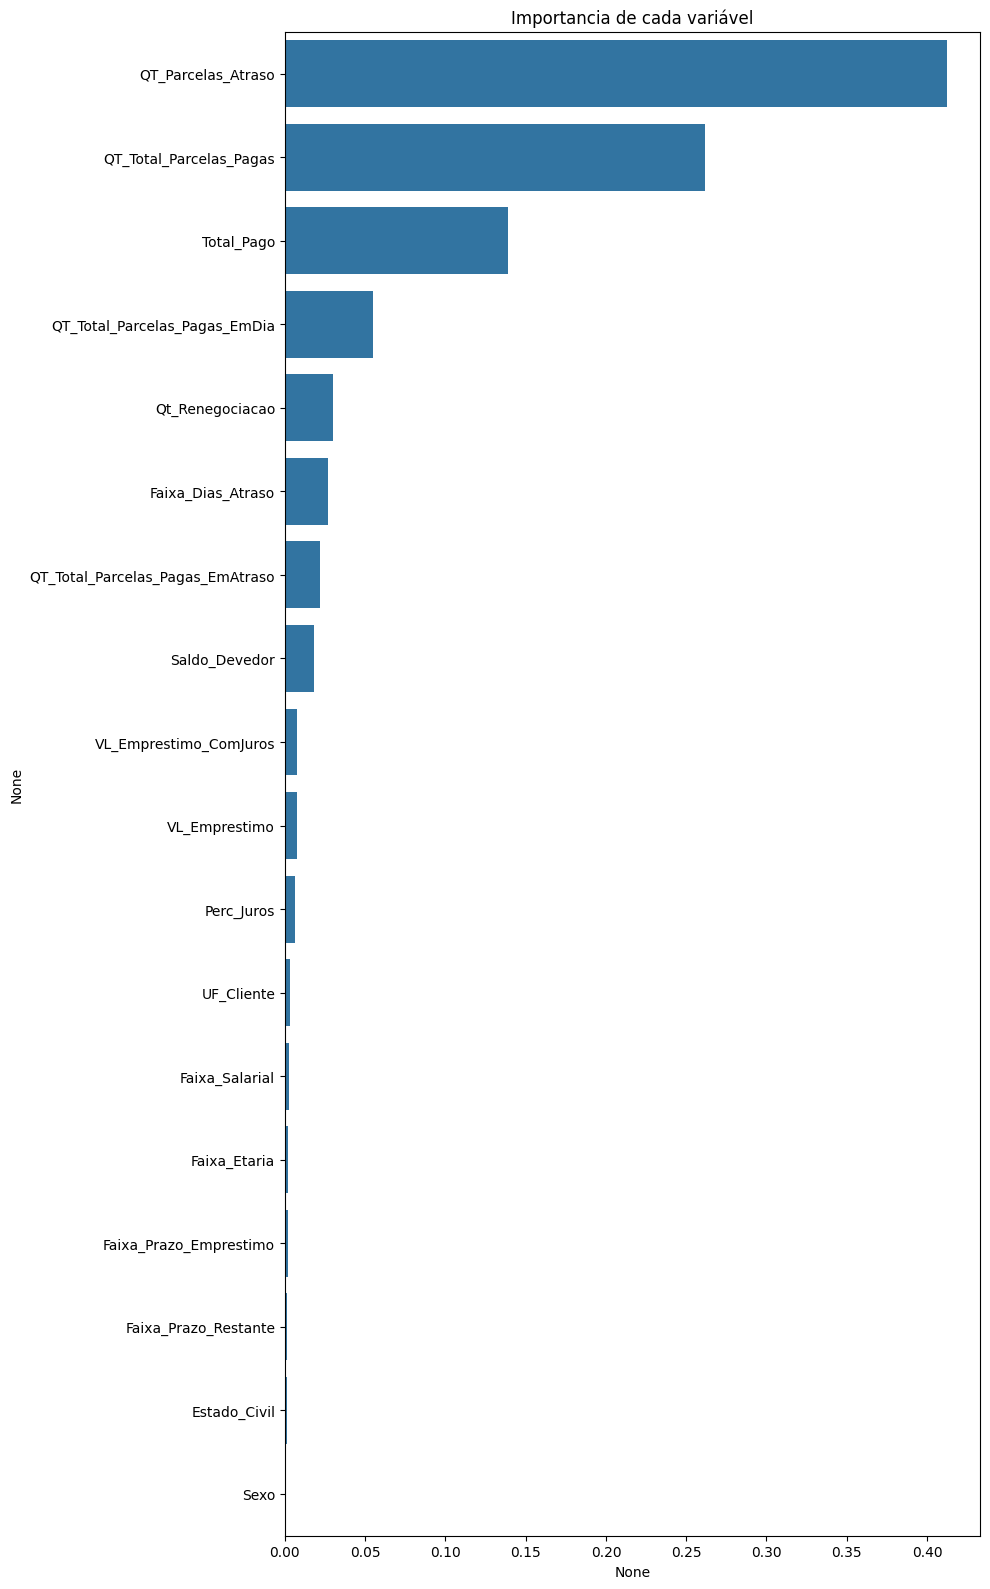

In [ ]:
# Exibindo a importancia de cada variavel no modelo preditivo
plt.rcParams['figure.figsize'] = [10.00, 16.00]
plt.rcParams['figure.autolayout'] = True

importances = pd.Series(data=clf.feature_importances_, index=Preditoras.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient = 'h').set_title('Importancia de cada variável')
plt.show()

In [ ]:
# Visuzalizando o percentual de importancia de cada variável
importances.sort_values(ascending = False)*100

QT_Parcelas_Atraso                 41.24
QT_Total_Parcelas_Pagas            26.19
Total_Pago                         13.92
QT_Total_Parcelas_Pagas_EmDia       5.50
Qt_Renegociacao                     2.97
Faixa_Dias_Atraso                   2.68
QT_Total_Parcelas_Pagas_EmAtraso    2.22
Saldo_Devedor                       1.83
VL_Emprestimo_ComJuros              0.74
VL_Emprestimo                       0.74
Perc_Juros                          0.62
UF_Cliente                          0.35
Faixa_Salarial                      0.24
Faixa_Etaria                        0.21
Faixa_Prazo_Emprestimo              0.18
Faixa_Prazo_Restante                0.14
Estado_Civil                        0.13
Sexo                                0.10
dtype: float64

In [ ]:
# Estamos apenas "simulando" os dados de teste
scores = clf.score(X_treino_normalizado, Y_treino)
scores

1.0

In [ ]:
# Simulando com os dados de teste
modelo_rf = {'Melhroes Hiperparametros':randomForest.best_params_,
              'Numero de Modelos Treinados': treino_rf.shape[0],
              'Melhor Score': str(round(randomForest.best_score_ * 100,2))+"%"}

In [ ]:
modelo_rf

{'Melhroes Hiperparametros': {'criterion': 'entropy',
  'max_depth': 10,
  'max_features': 'log2',
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 300},
 'Numero de Modelos Treinados': 324,
 'Melhor Score': '99.25%'}

## Aplicando o SVM

In [ ]:
# Construtor do SVM
modelo_svm = SVC()

In [ ]:
# Parametro default
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
# Valores para o grid de hiperparametros
grid_parametro = {'C': [0.1,1,10,100],
                  'gamma': [1,0.1,0.01,0.001],
                  'kernel': ['poly', 'rbf', 'sigmoid', 'linear'],
                  'degree': [2,3,4,],
                  'coef0': [0.5,1],
                  'decision_function_shape':['ovo','ovr'],
                  'max_iter': [-1,1]}

svm = GridSearchCV(modelo_svm, grid_parametro, n_jobs=8)

# Treinando os modelos
inicio = time.time()
svm.fit(X_treino_normalizado, Y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treino_svm = pd.DataFrame(svm.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {svm.best_score_ : .2%}")
print()
print(f"Hiperparâmetros Ideais: {svm.best_params_}")
print()
print("Tempo de Treinamento do Modelo: ", round(fim - inicio, 2))
print()
print("Número de treinamentos realizados: ", treino_svm.shape[0])

Acurácia em Treinamento:  99.04%

Hiperparâmetros Ideais: {'C': 100, 'coef0': 0.5, 'decision_function_shape': 'ovo', 'degree': 2, 'gamma': 1, 'kernel': 'linear', 'max_iter': -1}

Tempo de Treinamento do Modelo:  2836.68

Número de treinamentos realizados:  1536


In [ ]:
# Dicionário de métricas e Hiperparametros
modelo_svm = {
    'Melhores Hiperparametros': svm.best_params_,
    'Numero de Modelos Treinados': treino_svm.shape[0],
    'Melhor Score': str(round(svm.best_score_*100,2))+"%"
}

In [ ]:
modelo_svm


{'Melhores Hiperparametros': {'C': 100,
  'coef0': 0.5,
  'decision_function_shape': 'ovo',
  'degree': 2,
  'gamma': 1,
  'kernel': 'linear',
  'max_iter': -1},
 'Numero de Modelos Treinados': 1536,
 'Melhor Score': '99.04%'}

## Aplicando o modelo de KNN

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
n_neighbors = np.array([3,4,5,6,7,8,9,10,11,12])
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
leaf_size = np.array([30,31,32,33,34,35])
metric = np.array(['minkowski','euclidean'])


grid_parametro = dict(n_neighbors = n_neighbors,
                      algorithm = algorithm,
                      leaf_size = leaf_size,
                      metric = metric)

knn = GridSearchCV(knn, grid_parametro, n_jobs = 8)

# treino do modelo
inicio = time.time()
knn.fit(X_treino_normalizado, Y_treino)
fim = time.time()

# visualizando
treino_knn = pd.DataFrame(knn.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {knn.best_score_ : .2%}")
print()
print(f"Hiperparâmetros Ideais: {knn.best_params_}")
print()
print("Tempo de Treinamento do Modelo: ", round(fim - inicio, 2))
print()
print("Número de treinamentos realizados: ", treino_knn.shape[0])

Acurácia em Treinamento:  97.12%

Hiperparâmetros Ideais: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 11}

Tempo de Treinamento do Modelo:  460.09

Número de treinamentos realizados:  480


In [ ]:
# Dicionário de métricas e metadados
modelo_knn = {'Melhores Hiperparametros': knn.best_params_,
              'Numero de Modelos Treinados': treino_knn.shape[0],
              'Melhor Score': str(round(knn.best_score_*100,2))+"%"}

In [ ]:
modelo_knn

{'Melhores Hiperparametros': {'algorithm': 'auto',
  'leaf_size': 30,
  'metric': 'minkowski',
  'n_neighbors': 11},
 'Numero de Modelos Treinados': 480,
 'Melhor Score': '97.12%'}

In [ ]:
# Geranbdo o DataFrame com todos os valores de todos os modelos treinados
resumo = pd.DataFrame({'Random Forest':pd.Series(modelo_rf),
                       'SVM': pd.Series(modelo_svm),
                       'KNN': pd.Series(modelo_knn)})

In [ ]:
resumo

,Random Forest,SVM,KNN
Melhor Score,99.25%,99.04%,97.12%
Melhores Hiperparametros,NaN,"{'C': 100, 'coef0': 0.5, 'decision_function_sh...","{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
Melhroes Hiperparametros,"{'criterion': 'entropy', 'max_depth': 10, 'max...",NaN,NaN
Numero de Modelos Treinados,324,1536,480
